# Air Quality Forecasting using Time Series Machine Learning Models

## Notebook 3: Feature Engineering & Forecasting

## 1.0. Introduction
### 1.1. Project Goal
The goal of this project is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.
### 1.2. Context/ Problem Statement
A few years ago, China established the Air Quality Index (AQI) based on the level of five pollutants atmospheres, namely sulfur dioxide (SO2), nitrogen dioxide (NO2), particulate matter (PM10), carbon monoxide (CO) and ozone (O3) measured at the monitoring stations in each city.

## 2.0. Installing & Importing Libraries

In [2]:
# pip install pmdarima

In [67]:
# Libraries required for data analysis, visualization, and preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

import math  # For mathematical operations
import scipy.stats as stats  # Statistics module
from scipy.stats import mstats
import pylab
from statsmodels.tsa.stattools import adfuller # for ADF test
import statsmodels.api as sm # For decomposing the times series into various components
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic # For determining ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose # for ETS Plots
from statsmodels.tsa.api import VAR # Vector Auto Regression
from statsmodels.tsa.arima.model import ARIMA # For Time Series Analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX # For Time Series Analysis
import pmdarima as pm
from pmdarima import auto_arima # for determining ARIMA orders
from sklearn.metrics import mean_absolute_error, mean_squared_error # For measuring the errors

# Suppress FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 3.0. Importing Data

In [68]:
# Load the csv file to use for feature engineering.
Aotizhongxin_data = pd.read_csv('/Users/h.nderitu/Advanced Machine Learning/advml-week3project/Aotizhongxin_ts.csv')

# Display the first few rows
Aotizhongxin_data.head()

# Display the DataFrame info
Aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      35064 non-null  object 
 1   year          35064 non-null  int64  
 2   month         35064 non-null  int64  
 3   day           35064 non-null  int64  
 4   hour          35064 non-null  int64  
 5   PM2.5         35064 non-null  float64
 6   PM10          35064 non-null  float64
 7   SO2           35064 non-null  float64
 8   NO2           35064 non-null  float64
 9   CO            35064 non-null  float64
 10  O3            35064 non-null  float64
 11  TEMP          35064 non-null  float64
 12  PRES          35064 non-null  float64
 13  DEWP          35064 non-null  float64
 14  RAIN          35064 non-null  float64
 15  wd            35064 non-null  object 
 16  WSPM          35064 non-null  float64
 17  wd_direction  35064 non-null  float64
 18  season        35064 non-nu

In [69]:
# rename datetime column to date
Aotizhongxin_data.rename(columns={'datetime':'date'}, inplace=True)
# Display the DataFrame info to confirm
Aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          35064 non-null  object 
 1   year          35064 non-null  int64  
 2   month         35064 non-null  int64  
 3   day           35064 non-null  int64  
 4   hour          35064 non-null  int64  
 5   PM2.5         35064 non-null  float64
 6   PM10          35064 non-null  float64
 7   SO2           35064 non-null  float64
 8   NO2           35064 non-null  float64
 9   CO            35064 non-null  float64
 10  O3            35064 non-null  float64
 11  TEMP          35064 non-null  float64
 12  PRES          35064 non-null  float64
 13  DEWP          35064 non-null  float64
 14  RAIN          35064 non-null  float64
 15  wd            35064 non-null  object 
 16  WSPM          35064 non-null  float64
 17  wd_direction  35064 non-null  float64
 18  season        35064 non-nu

In [ ]:
# change the date column to datetime
Aotizhongxin_data['date'] = pd.to_datetime(Aotizhongxin_data['date'])

# Display the DataFrame info to confirm
Aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          35064 non-null  datetime64[ns]
 1   year          35064 non-null  int64         
 2   month         35064 non-null  int64         
 3   day           35064 non-null  int64         
 4   hour          35064 non-null  int64         
 5   PM2.5         35064 non-null  float64       
 6   PM10          35064 non-null  float64       
 7   SO2           35064 non-null  float64       
 8   NO2           35064 non-null  float64       
 9   CO            35064 non-null  float64       
 10  O3            35064 non-null  float64       
 11  TEMP          35064 non-null  float64       
 12  PRES          35064 non-null  float64       
 13  DEWP          35064 non-null  float64       
 14  RAIN          35064 non-null  float64       
 15  wd            35064 non-null  object

In [71]:
# Set 'date' column as index
Aotizhongxin_data.set_index('date', inplace=True)

In [72]:
# confirm datetime column is an index
Aotizhongxin_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,wd_direction,season
date,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,337.5,Spring
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,0.0,Spring
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,337.5,Spring
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,315.0,Spring
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,0.0,Spring


In [73]:
Aotizhongxin_data.tail() # Display the last few rows

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,wd_direction,season
date,,,,,,,,,,,,,,,,,,
2017-02-28 19:00:00,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,315.0,Winter
2017-02-28 20:00:00,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,292.5,Winter
2017-02-28 21:00:00,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,315.0,Winter
2017-02-28 22:00:00,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,337.5,Winter
2017-02-28 23:00:00,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,22.5,Winter


In [74]:
# set the frequency of the data as hourly to change to time series data
Aotizhongxin_data = Aotizhongxin_data.asfreq('h')

print(f"Data for Aotizhongxin station set to hourly frequency")
Aotizhongxin_data.info() 

Data for Aotizhongxin station set to hourly frequency
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          35064 non-null  int64  
 1   month         35064 non-null  int64  
 2   day           35064 non-null  int64  
 3   hour          35064 non-null  int64  
 4   PM2.5         35064 non-null  float64
 5   PM10          35064 non-null  float64
 6   SO2           35064 non-null  float64
 7   NO2           35064 non-null  float64
 8   CO            35064 non-null  float64
 9   O3            35064 non-null  float64
 10  TEMP          35064 non-null  float64
 11  PRES          35064 non-null  float64
 12  DEWP          35064 non-null  float64
 13  RAIN          35064 non-null  float64
 14  wd            35064 non-null  object 
 15  WSPM          35064 non-null  float64
 16  wd_direction  3

## 4.0. Deletion of unneccesary features

In [75]:
# Delete unnecessary columns/features that will not be needed during modeling. 
# Year, month, day and hour columns not needed as there is already a datetime index
# wd column is not needed as it is not a numerical feature
# season column is not needed as it is not a numerical feature
Aotizhongxin_data = Aotizhongxin_data.drop(['year', 'month', 'day', 'hour','wd','season'], axis=1)

In [76]:
# Verify new features
Aotizhongxin_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_direction
date,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,337.5
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,0.0
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,337.5
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,315.0
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,0.0


In [77]:
# Verify data information
Aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PM2.5         35064 non-null  float64
 1   PM10          35064 non-null  float64
 2   SO2           35064 non-null  float64
 3   NO2           35064 non-null  float64
 4   CO            35064 non-null  float64
 5   O3            35064 non-null  float64
 6   TEMP          35064 non-null  float64
 7   PRES          35064 non-null  float64
 8   DEWP          35064 non-null  float64
 9   RAIN          35064 non-null  float64
 10  WSPM          35064 non-null  float64
 11  wd_direction  35064 non-null  float64
dtypes: float64(12)
memory usage: 3.5 MB


## 5.0. Check for stationarity of Time Series Data for the target variables

- **Augmented Dickey-Fuller (ADF) Test** will be used to check for stationarity
- Null hypothesis(HO): The time series for each target variable has a unit root (non- stationary)
- Alternate hypothesis(H1): The time series for each target variable has no unit root (stationary)
- Rejection of the null hypothesis will mean that the time series data for each target variable is stationary if the following conditions are met:
  - p-value <= significance level (default: 0.05)
  - test statistic (ADF statistic) < than the critical value

**Define a function for conducting the ADF test for stationarity.**

In [78]:
# define a function for conducting the ADF test for stationarity.
def adf_test(series, column_name):
    """
    Perform the Augmented Dickey-Fuller (ADF) test for stationarity.
    
    Args:
        series (pd.Series): Time series data.
        column_name (str): Name of the column.
    
    Returns:
        bool: True if the series is stationary, False otherwise.
    """
    result = adfuller(series.dropna())  # Remove NaNs before testing
    p_value = result[1]  # Extract p-value

    print(f'ADF Statistic for {column_name}: {result[0]}')
    print(f'p-value for {column_name}: {p_value}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    return p_value < 0.05  # Return True if stationary, False if non-stationary

### 5.1. PM2.5

In [79]:
# ADF test for PM2.5 target variable
adf_test(Aotizhongxin_data['PM2.5'], 'Fine Particulate matter')

ADF Statistic for Fine Particulate matter: -19.192200640760625
p-value for Fine Particulate matter: 0.0
Critical Values:
	1%: -3.43053678680168
	5%: -2.861622555151452
	10%: -2.5668139415123283


True

Fine particulate matter time series data is stationary

### 5.2. PM10

In [80]:
# ADF test for PM10 target variable
adf_test(Aotizhongxin_data['PM10'], 'Coarse Particulate Matter')

ADF Statistic for Coarse Particulate Matter: -18.8647964475725
p-value for Coarse Particulate Matter: 0.0
Critical Values:
	1%: -3.43053678680168
	5%: -2.861622555151452
	10%: -2.5668139415123283


True

Coarse particulate matter time series data is stationary

### 5.3. SO2

In [82]:
# ADF test for PM2.5 target variable
adf_test(Aotizhongxin_data['SO2'], 'Sulphur Dioxide')

ADF Statistic for Sulphur Dioxide: -13.674456353655142
p-value for Sulphur Dioxide: 1.439076899323267e-25
Critical Values:
	1%: -3.4305367707970675
	5%: -2.8616225480780315
	10%: -2.5668139377473302


True

Sulphur Dioxide time series data is stationary

### 5.4. NO2

In [83]:
# ADF test for NO2 target variable
adf_test(Aotizhongxin_data['NO2'], 'Nitrogen Dioxide')

ADF Statistic for Nitrogen Dioxide: -17.761936854764304
p-value for Nitrogen Dioxide: 3.3355809107993784e-30
Critical Values:
	1%: -3.4305367814665044
	5%: -2.8616225527935106
	10%: -2.566813940257257


True

Nitrogen Dioxide time series data is stationary

### 5.5. CO

In [84]:
# ADF test for CO target variable
adf_test(Aotizhongxin_data['CO'], 'Carbon Monoxide')

ADF Statistic for Carbon Monoxide: -15.705145821026822
p-value for Carbon Monoxide: 1.3808553125105168e-28
Critical Values:
	1%: -3.43053679213716
	5%: -2.8616225575095284
	10%: -2.566813942767471


True

Carbon Monoxide time series data is stationary

### 5.6. 03

In [85]:
# ADF test for Ozone target variable
adf_test(Aotizhongxin_data['O3'], 'Ozone')

ADF Statistic for Ozone: -11.162056623218096
p-value for Ozone: 2.772198686708556e-20
Critical Values:
	1%: -3.4305367814665044
	5%: -2.8616225527935106
	10%: -2.566813940257257


True

0zone time series data is stationary

## 6.0. Autocorrelation Analysis of the target variables

**Create a user defined function to plot ACF and PACF plots.**

In [86]:
# create a user defined function to plot ACF and PACF plots. 
def plot_acf_pacf(data, series_name, lag=720):
    """
    Plot ACF and PACF for time series data with the series name in the title.

    Parameters:
    data (pd.Series): Time series data.
    series_name (str): Name of the time series variable.
    lags (int): Number of lags to plot.
    """
    fig, axes = plt.subplots(2, 1, figsize=(12,7))
    
    # ACF Plot
    sm.graphics.tsa.plot_acf(data.dropna(), lags = lag, ax=axes[0])
    axes[0].set_title(f"Autocorrelation (ACF) for {series_name}")

    # PACF Plot
    sm.graphics.tsa.plot_pacf(data.dropna(), lags = lag, ax=axes[1])
    axes[1].set_title(f"Partial Autocorrelation (PACF) for {series_name}")

    plt.tight_layout
    plt.show()

### 6.1. PM2.5

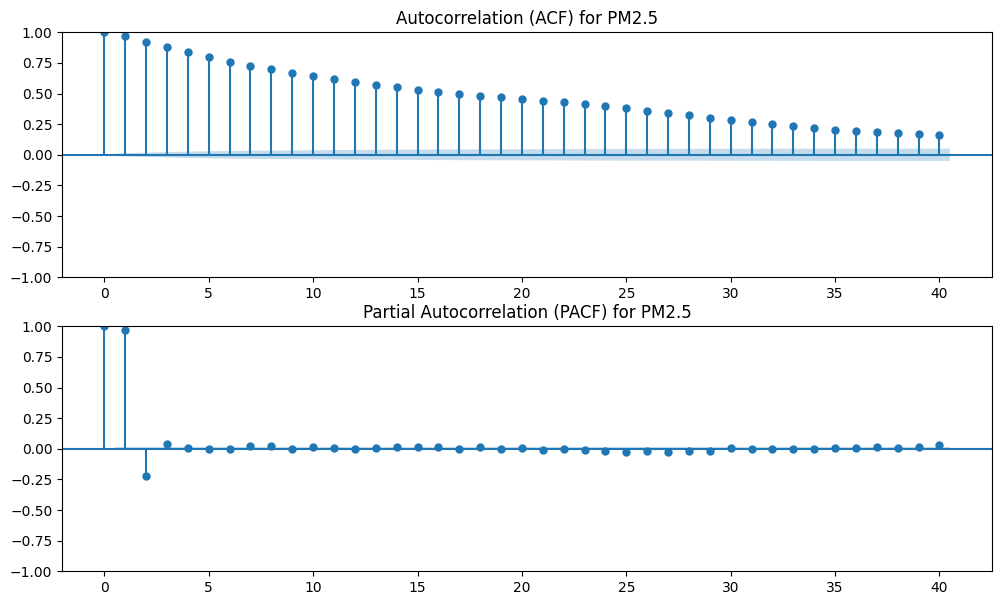

In [87]:
# PLOT ACF and PACF plots for PM2.5 time series data
# since the data is recorded hourly, 720 lags(equivalent to 30 days)a pattern in 30 days will be checked
plot_acf_pacf(Aotizhongxin_data['PM2.5'], series_name="PM2.5", lag=40) 

**Autocorrelation Function (ACF)**:
   - The ACF plot reveals significant autocorrelations that decay gradually as the lag increases. This suggests that the data might not yet be stationary and could require differencing to stabilize the mean. The slower decay is often indicative of seasonal effects or trends in the data.
   - Significant autocorrelations diminish at around lag 2 or 3, suggesting \(q \approx 2\) or \(3\).

**Partial Autocorrelation Function (PACF)**:
   - The PACF plot displays strong partial autocorrelation at lag 1, followed by a sharp drop to near zero. This indicates that a low-order autoregressive (AR) model, such as AR(1), might be suitable for the data.

- If using ARIMA modeling, start with \(p = 1\) (based on PACF), \(d = 0\) or \(1\) (depending on stationarity), and \(q = 2\) or \(3\) (based on ACF).
- Perform model diagnostics (AIC/BIC, residual analysis) to refine the parameter values.
- Seasonal ARIMA (SARIMA) will be tested if there are noticeable periodic patterns in the data.

### 6.2. PM10

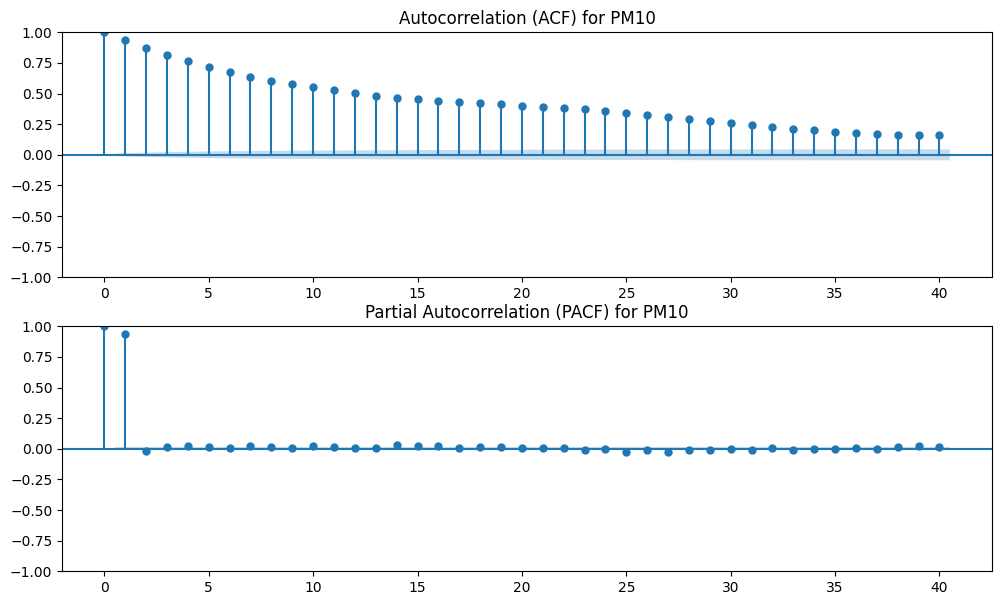

In [88]:
# PLOT ACF and PACF plots for PM10 time series data
plot_acf_pacf(Aotizhongxin_data['PM10'], series_name="PM10", lag=40) 

ACF Plot
- The ACF starts at a high value (lag 0) and gradually decreases as the lag increases.
- The gradual decline suggests that the time series has dependencies over multiple time steps, meaning past values affect the current value.
- This may indicate the presence of trend or seasonal components, depending on the data's periodicity.

PACF Plot
- The PACF is significant for the first two lags and then drops to near zero.
- This behavior indicates that an AR(2) (Autoregressive of order 2) model might be appropriate, as only the first two lags have significant contributions.

For ARIMA model:
- p (AR order): From the PACF, start with p=2.
- q (MA order): From the ACF, try q=1 or 2 based on the data.
- d (Differencing): If the series isn't stationary (e.g., the ACF doesn’t drop quickly to zero), differencing may be needed.

### 6.3. SO2

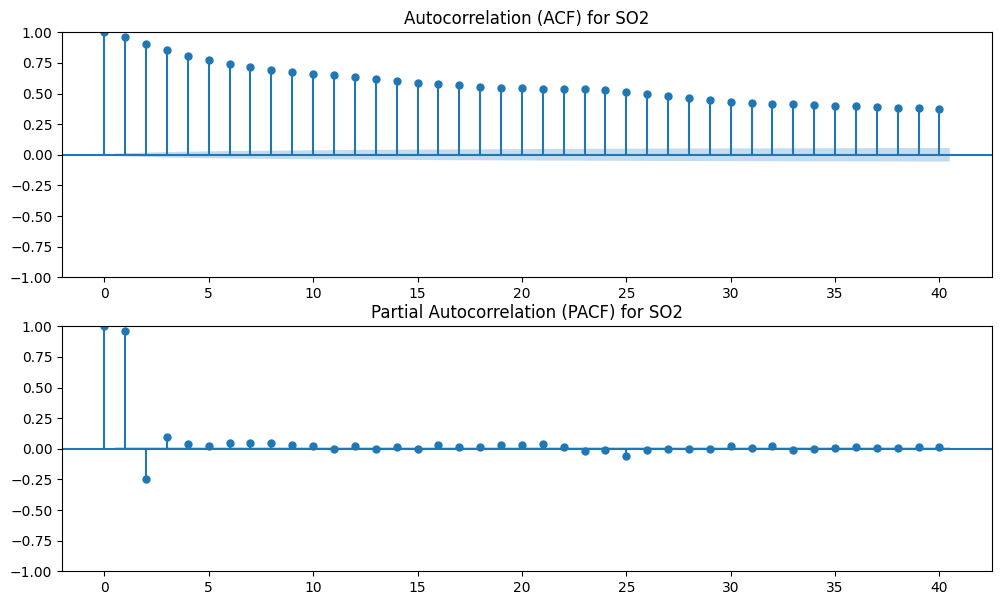

In [89]:
# PLOT ACF and PACF plots for SO2 time series data
plot_acf_pacf(Aotizhongxin_data['SO2'], series_name="SO2", lag=40) 

**1. ACF Plot**
- As the lag increases, the autocorrelation gradually diminishes, indicating a time series with some level of short-term dependency but no strong periodicity or seasonal cycles.
- This suggests that the dataset may require differencing to achieve stationarity if used in ARIMA modeling, as the gradual decay hints at a non-stationary process.

**2. PACF Plot**
- The PACF plot initially shows significant partial autocorrelation at the first few lags (e.g., lags 1 and 2), followed by a rapid decrease in values around zero.
- Such a pattern suggests that the dataset may have a short autoregressive structure, which could justify using an AR(p) model with a small p value, like AR(2).
- Beyond these initial spikes, there are no significant values, indicating limited higher-order dependencies in the data.

Differencing (d):
- A slow decline in the ACF often suggests the need to difference the data (e.g., first-order differencing d=1) to stabilize the mean and achieve stationarity.

Autoregressive (p):
- From the PACF, start with p=2, as the first two lags show significant spikes.

Moving Average (q):
- The ACF reveals limited residual correlations, so testing for q=0, 1, or 2 might be appropriate.

### 6.4. NO2

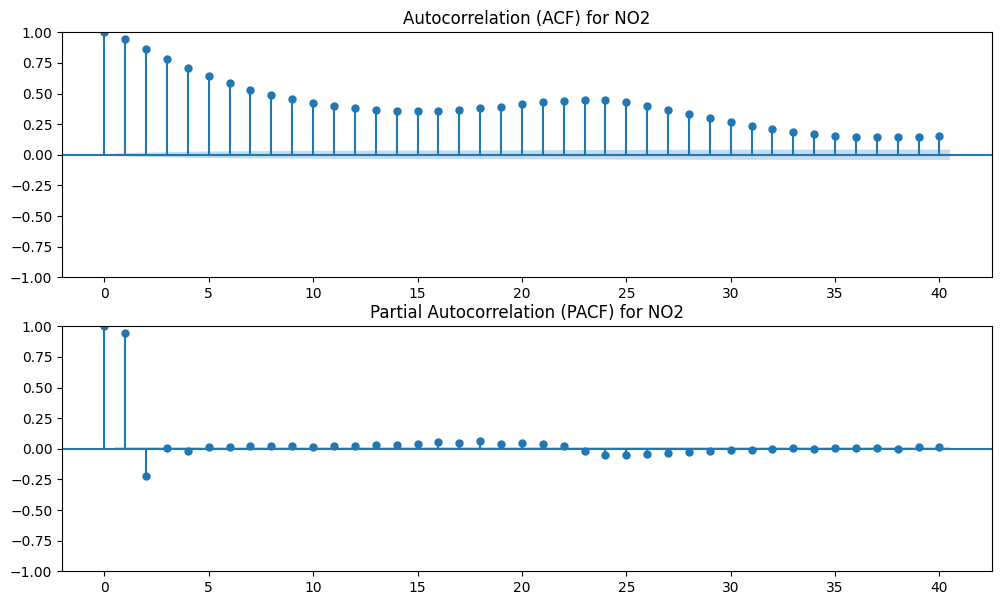

In [90]:
# PLOT ACF and PACF plots for NO2 time series data
plot_acf_pacf(Aotizhongxin_data['NO2'], series_name="NO2", lag=40) 

 **1. ACF Plot**
- The ACF plot starts with a strong autocorrelation at lag 0, which gradually diminishes as the lag increases.
- The oscillatory pattern around zero might suggest that NO2 data has periodic or seasonal influences.
- The significant early lags could indicate dependencies that may need to be modeled with a moving average (MA) term.

 **2. PACF Plot**
- The PACF shows significant spikes at lag 0 and lag 1, followed by a sharp drop to near zero for the remaining lags.
- This pattern suggests the possibility of using an autoregressive (AR) component with order 𝑝 = 1

 **Insights**
- The ACF hints at long-term dependencies or seasonality, while the PACF suggests a short-term relationship best captured by one or two recent lags.
- Together, they indicate that an ARIMA(1, d, 1) or ARIMA(1, d, 0) model could be a good starting point, depending on whether differencing (𝑑 > 0) is necessary for stationarity.

### 6.5 CO

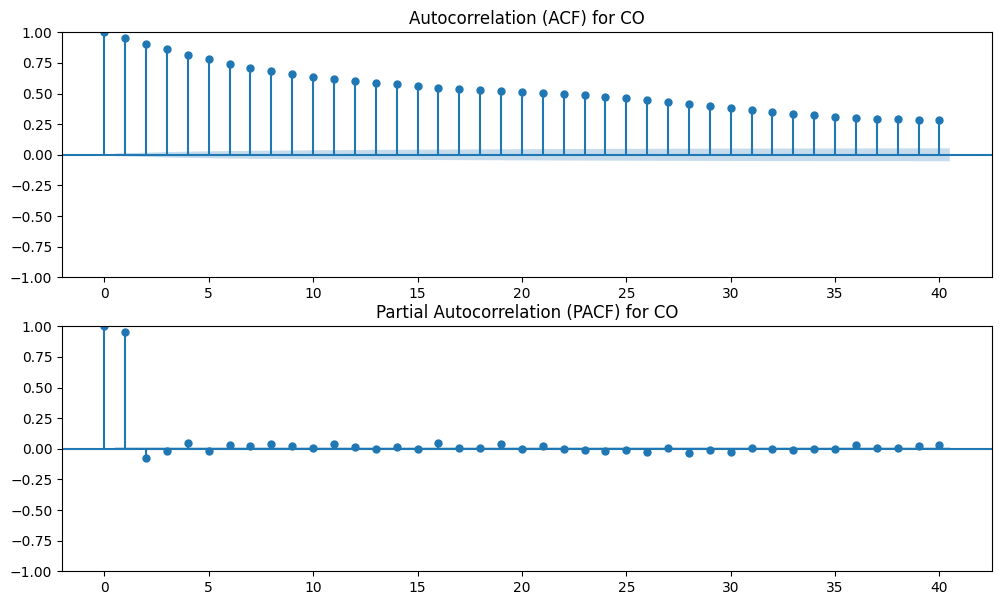

In [91]:
# PLOT ACF and PACF plots for CO time series data
plot_acf_pacf(Aotizhongxin_data['CO'], series_name="CO", lag=40) 

**1. ACF Plot**
- It shows significant autocorrelation across several lags, gradually diminishing as the lag increases.
- This pattern suggests that the time series has a long-term dependency and is possibly non-stationary (meaning its statistical properties change over time).
- The lag where autocorrelation becomes insignificant can help determine the q (moving average) parameter in ARIMA models.
- If the series is non-stationary, differencing (to stabilize the mean) might be necessary.

**2. PACF Plot**
- It shows strong partial autocorrelation at lag 1 and 2, with a sharp drop-off after these lags.
- This pattern suggests that the data has a short-term dependency and that an AR(p) model with 𝑝 = 2
 may be suitable.

**Insights**
ARIMA Modeling: Based on the plots:
- p (AR order) = 2 (from PACF).
- q (MA order) = 1 or 2 (from ACF).
- d (Differencing) = 1 (if non-stationary).

### 6.6. O3

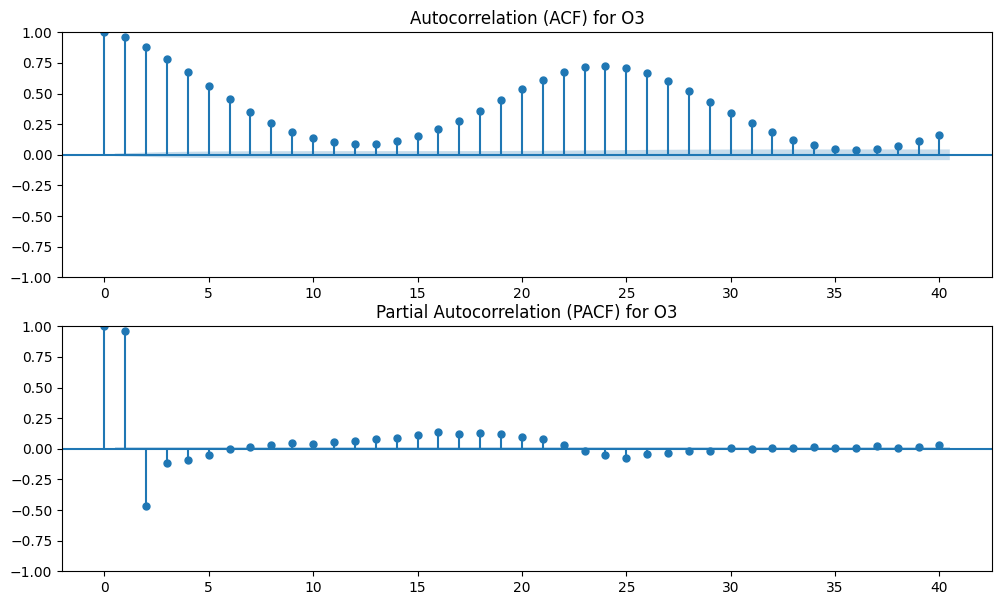

In [92]:
# PLOT ACF and PACF plots for O3 time series data
plot_acf_pacf(Aotizhongxin_data['O3'], series_name="O3", lag=40) 

 **ACF Plot**
- Strong autocorrelation at lag 0 (which is expected, as any series is perfectly correlated with itself).
- A cyclical pattern of peaks and troughs, suggesting the presence of seasonality in the data.
- The gradual decay of autocorrelation over time also hints at a trend or non-stationarity in the series.

Implication:
- The oscillatory nature may indicate that ozone levels fluctuate with a certain frequency, like daily or seasonal cycles.
- If building a model, you might need to account for this periodic behavior (e.g., using SARIMA or seasonal decomposition).

 **PACF Plot**
- Significant partial autocorrelation at the first few lags, particularly at lags 1 and 2, followed by values close to zero at higher lags.This suggests that the series has short-term dependencies.

Implication:
- The significant spikes at the first lags point to a possible AR (autoregressive) component. An AR(2) model might work well as a starting point to capture these dependencies.
- After the first few lags, the PACF becomes mostly flat, indicating that additional lags may not add much to the predictive power.
  
 **Insights**
- Seasonality: The periodic behavior in the ACF indicates seasonality, which can be explicitly modeled using a seasonal component in SARIMA.

- Model Suggestions: Based on the plots:
   - ARIMA(p, d, q): Start with 𝑝 = 2 (from PACF), 𝑑 = 1 (if non-stationary), 𝑞 = 0 or 1 (from ACF).
   - SARIMA: If seasonality is strong, explore adding a seasonal component.

## 7.0. Time Series decomposition of the target variables (6 air pollutants)

Function for conducting ETS decomposition for the target variables

In [ ]:
# create a function for conducting ETS decomposition for the target variables
def plot_ets_decomposition(data, freq, series_name="Time Series"):
    """
    Perform ETS decomposition with a given frequency and include the series name in titles.
    Modify the x-axis to show years starting with the first year in the dataset.

    Parameters:
    data (pd.Series): Time series data (must have a DatetimeIndex).
    series_name (str): Name of the time series variable.
    """
    # Perform ETS decomposition
    decomposition = seasonal_decompose(data.dropna(), period=freq, model='additive')

    # Create plots
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    
    decomposition.observed.plot(ax=axes[0], color='black')
    axes[0].set_title(f"Observed {series_name}")
    
    decomposition.trend.plot(ax=axes[1], color='blue')
    axes[1].set_title(f"Trend {series_name}")
    
    decomposition.seasonal.plot(ax=axes[2], color='green')
    axes[2].set_title(f"Seasonality ({series_name})")
    
    decomposition.resid.plot(ax=axes[3], color='red')
    axes[3].set_title(f"Residuals {series_name}")
   
    # Format ticks and apply consistent x-axis settings
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()


### 7.1. PM2.5

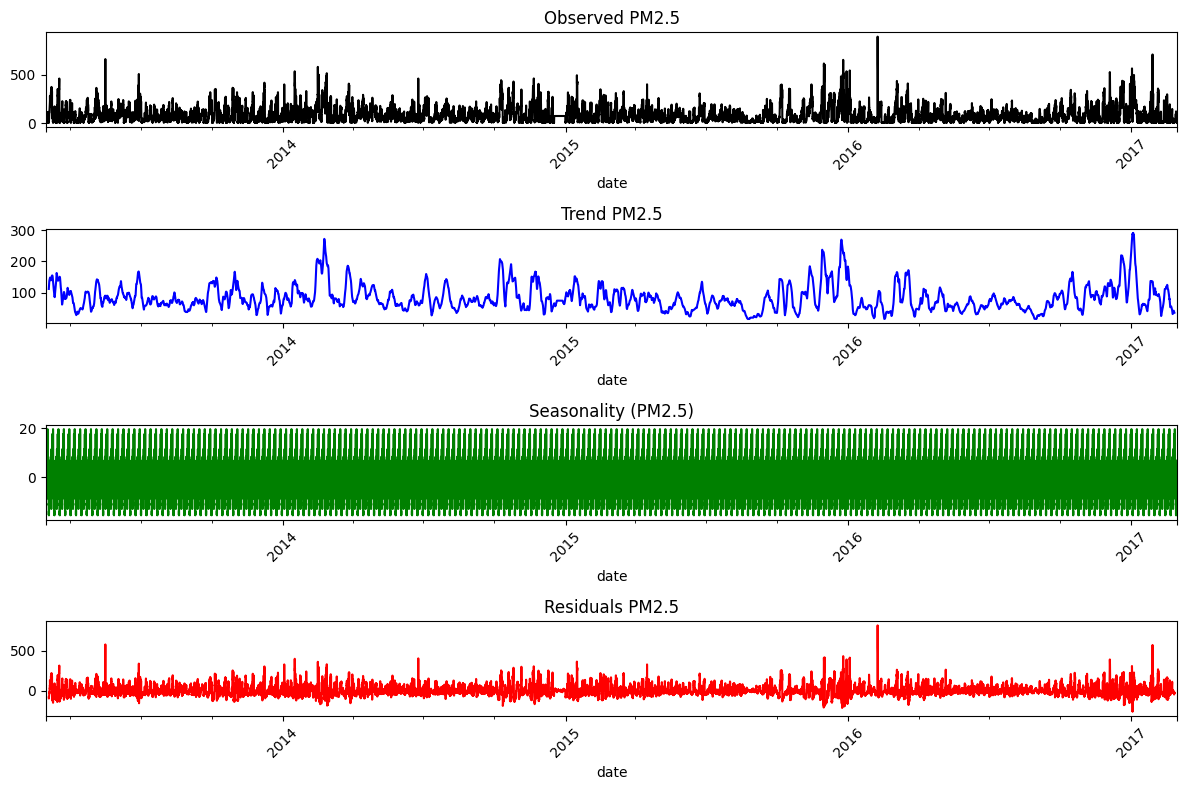

In [94]:
# ETS decomposition for PM 2.5
plot_ets_decomposition(Aotizhongxin_data['PM2.5'], freq=168, series_name="PM2.5") # 168 hours in a week

**Observed PM2.5** - original time series of PM2.5 pollution levels.
   - The fluctuations indicate that pollution levels vary significantly over time, with some sharp peaks (high pollution events).

**Trend Component** - long-term trend of PM2.5 pollution.
   - The overall trend appears to have periods of increase and decrease, with pollution levels rising more noticeably toward 2016.
   - This can indicate long-term changes in pollution patterns, possibly due to seasonal variations, policy changes, or meteorological factors.

**Seasonality Component** - repeated weekly patterns in PM2.5 levels.
   - The strong oscillations suggest that PM2.5 levels follow a **weekly cycle**, possibly influenced by human activity (e.g., weekday traffic vs. weekend reductions).

**Residuals** - unexplained noise** after removing trend and seasonality.
- Large spikes which may correspond to unexpected pollution events (e.g., industrial accidents, fires, weather anomalies).

### 7.2. PM10

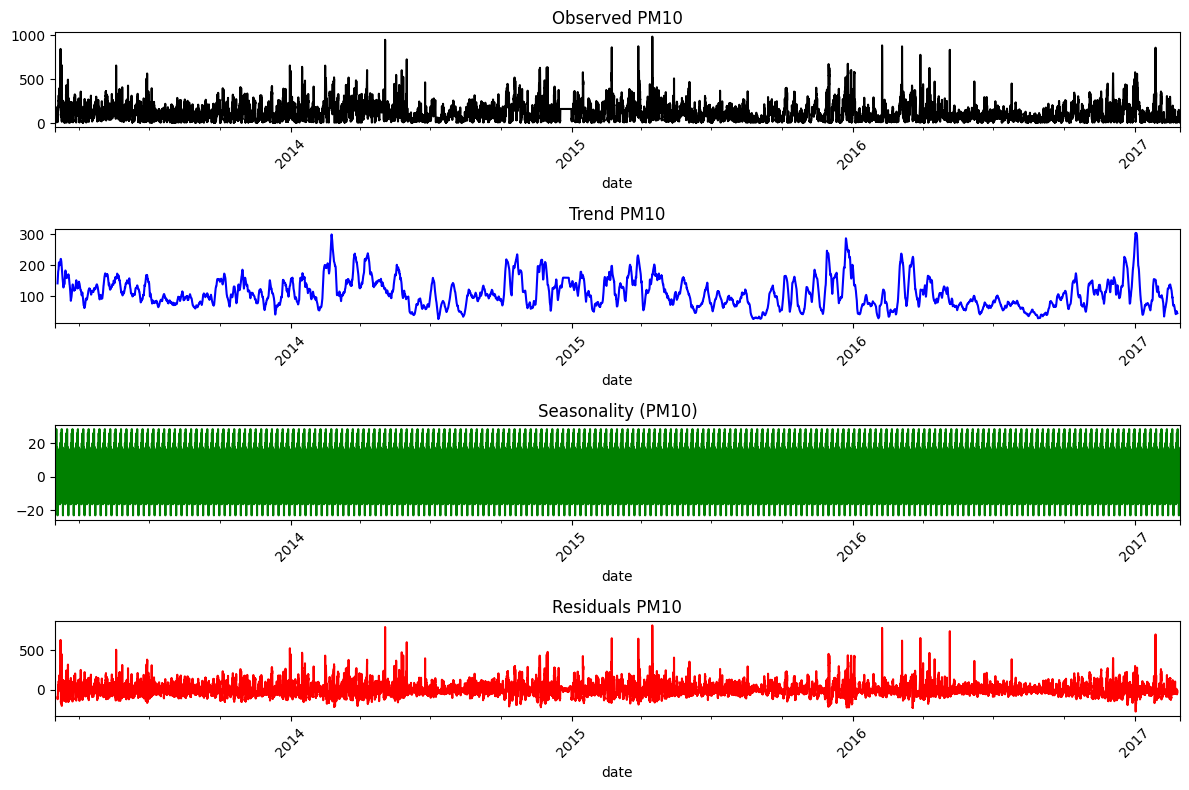

In [95]:
# ETS decomposition for PM10
plot_ets_decomposition(Aotizhongxin_data['PM10'], freq=168, series_name="PM10") # 168 hours in a week

 **Observed PM10** - original PM10 time series data.
- The fluctuations show that PM10 levels vary significantly, with **frequent spikes** indicating pollution events.
- Pollution levels seem to be higher in later years (2015-2016).

 **Trend Component** - long-term trend of PM10 pollution.
- PM10 levels show a general increase and then fluctuate over time.
- Around **2016**, there is a noticeable **increase in pollution levels**, suggesting worsening air quality during this period.

 **Weekly Seasonality** - repeating weekly patterns** in PM10 levels.
- The **strong oscillations** indicate consistent **weekly cycle** of PM10 pollution.
- This suggests that PM10 levels are influenced by human activities (e.g., weekday industrial activity, traffic, and weather patterns)
  
 **Residuals** - unexplained noise** after removing the trend and seasonality.
- Large spikes in residuals indicate **unexpected pollution events** not captured by the trend or seasonality.
- These may be due to **unusual weather conditions, industrial emissions, or special events** (e.g., festivals, construction work, wildfires).

### 7.3 S02

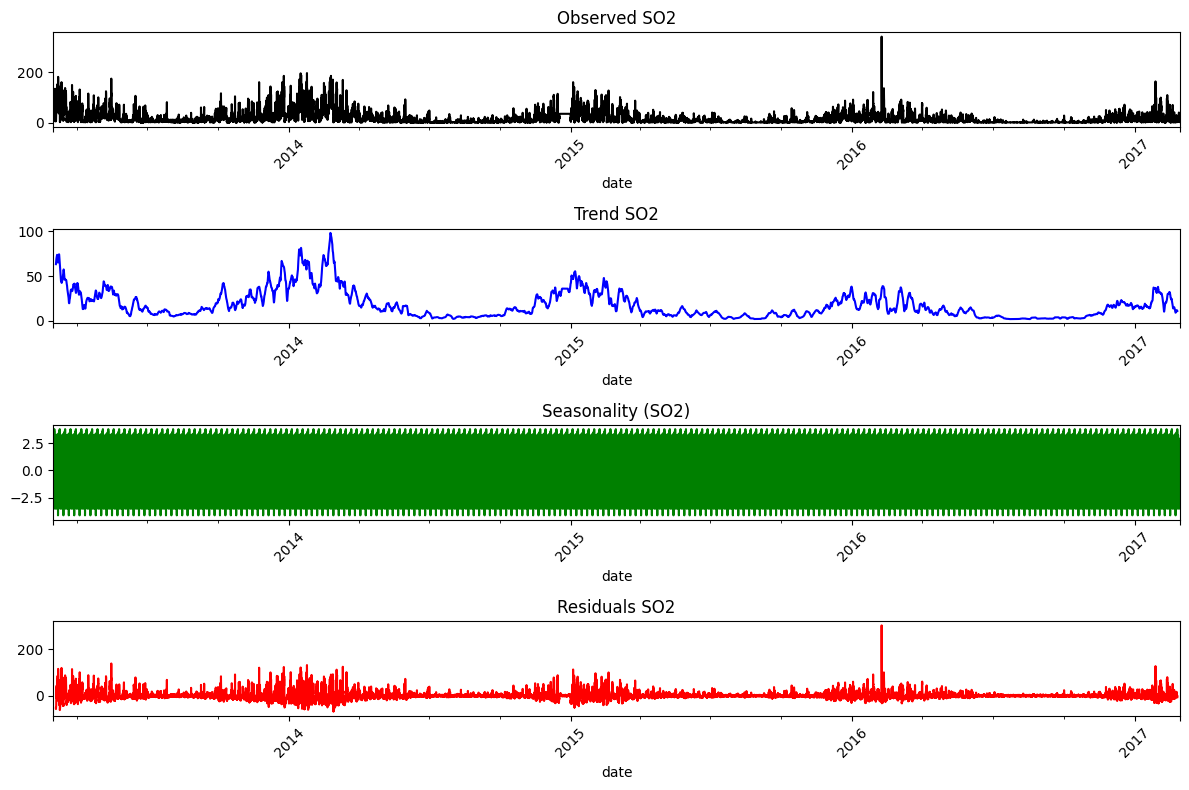

In [96]:
# ETS decomposition for SO2
plot_ets_decomposition(Aotizhongxin_data['SO2'], freq=168, series_name="SO2") # 168 hours in a week

 **Observed SO2** - original SO2 concentration over time.
- **High fluctuations in the earlier years (2013–2015)**, with several spikes.
- The pollution level seems to **drop significantly in mid-2015** but starts rising again towards **2016–2017**.
- A **major peak around 2016** suggests a possible extreme pollution event.
- **Declining long-term trend** in SO2 levels (2013–2015), likely due to air quality improvements. 
- **A slight increase in 2016–2017**, possibly due to policy relaxations or seasonal effects. 

 **Trend Component** - long-term changes in SO2 levels.
- **Declining trend from 2013 to 2015**, possibly due to air quality regulations or seasonal effects.
- After mid-2015, SO2 levels seem to **stabilize at lower levels** before showing a slight increase in 2016–2017.
- This pattern suggests **possible reductions due to environmental policies** followed by a slight rebound in pollution.

 **Weekly Seasonality**
- This captures **repeating weekly patterns** in SO2 pollution.
- The strong oscillations indicate a **consistent weekly cycle**.
- Weekly variations could be due to **industrial activities, power plant emissions, or transportation patterns** that follow a weekly schedule.
- **Strong weekly seasonality**, suggesting emissions are linked to human activity patterns.

 **4. Residuals** - unexplained variations after removing trend and seasonality.
- Large spikes** suggests **unexpected pollution events**, possibly due to:
  - Industrial emissions.
  - Weather changes (e.g., temperature inversions trapping pollutants).
  - Policy changes (e.g., temporary shutdowns or reopenings of factories).
- The **large spike in 2016** indicates a significant event that increased SO2 levels for a short period.

### 7.4 NO2

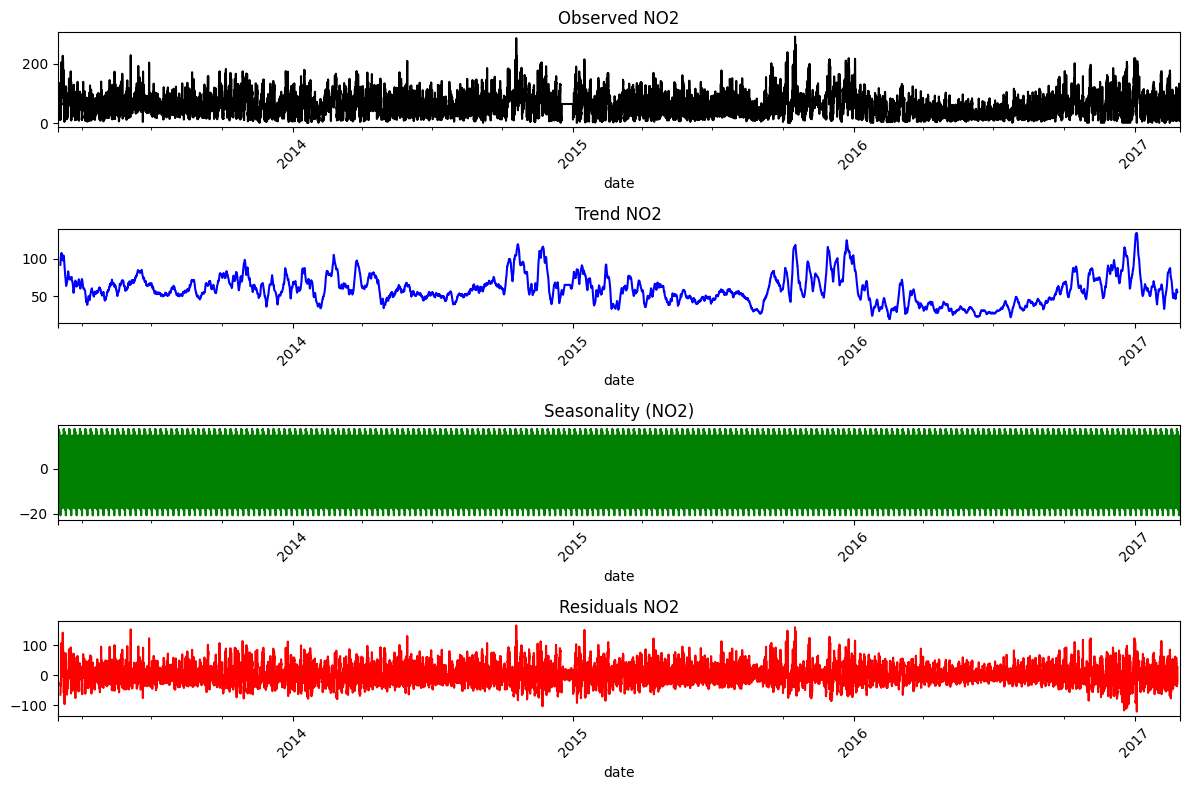

In [97]:
# ETS decomposition for NO2
plot_ets_decomposition(Aotizhongxin_data['NO2'], freq=168, series_name="NO2") # 168 hours in a week 

**Observed NO2** - raw NO2 data over time.  
   - NO2 levels fluctuate consistently, with some periods of higher concentration spikes, especially in 2016.
   - There appears to be some seasonality and irregular peaks, possibly due to changes in traffic, industrial activities, or weather conditions.
  
**Trend Component** - long-term trend of NO2.  
   - The trend exhibits gradual variations with multiple peaks and declines.
   - NO2 levels appear to rise and fall over extended periods, possibly due to seasonal effects or pollution control measures.
   - A notable increase is seen around 2016, followed by some fluctuations

**Seasonality Component** - weekly periodic pattern in NO2 levels.  
   - The seasonality component here appears highly compressed, which may indicate weekly fluctuations rather than a longer seasonal cycle.
   - The extremely tight and dense pattern suggests frequent periodic changes.

**Residuals** - part of the NO2 levels that cannot be explained by the trend or seasonality.  
   - The residuals display somewhat consistent fluctuations but also larger spikes at certain times, possibly due to pollution events or sudden changes in emissions.

### 7.5 CO

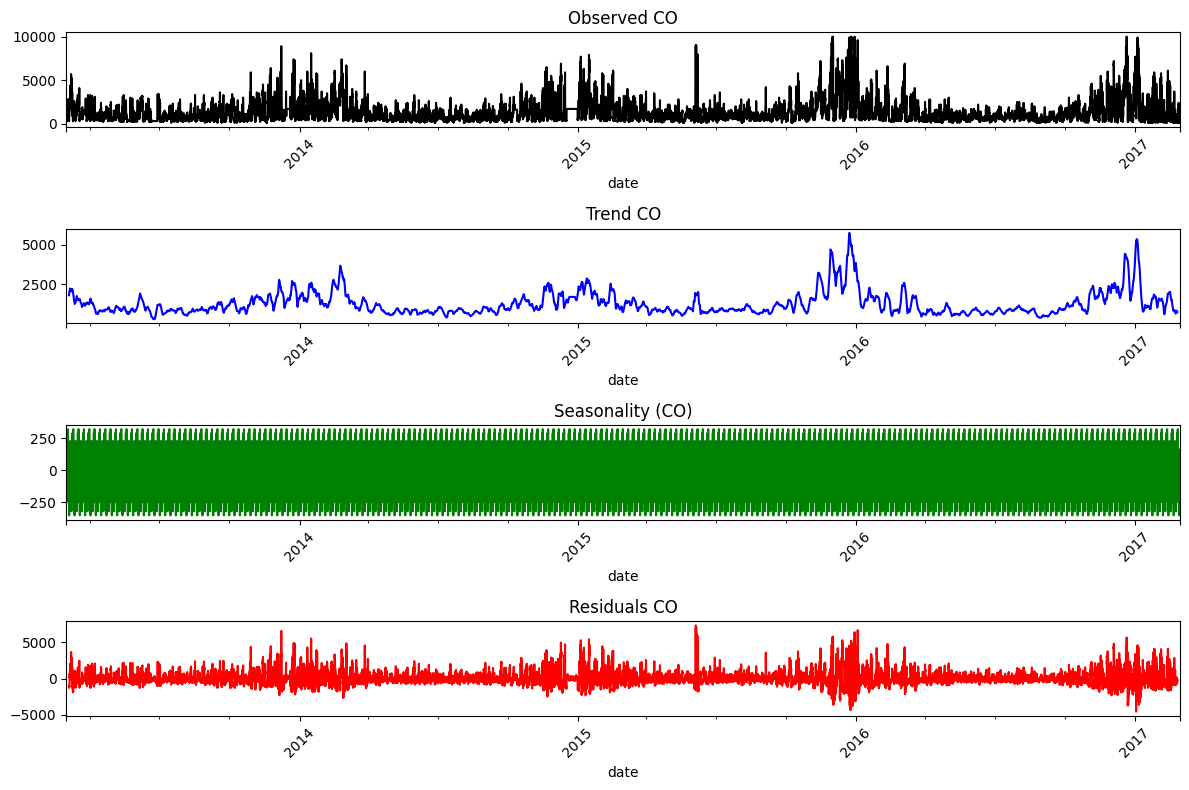

In [98]:
# ETS decomposition for CO
plot_ets_decomposition(Aotizhongxin_data['CO'], freq=168, series_name="CO") # 168 hours in a week which means 7 days

**Observed CO** - raw CO data over time.
   - high variability** with several spikes.
   - Around **2016–2017**, there is a noticeable increase in CO levels, suggesting potential pollution events.

**Trend Component** - overall trend in CO levels.
   - Initially, there is a **gradual decline**, but after 2015, the trend starts **rising again**.
   - Around **2016–2017**, there is a significant **increase in CO concentrations**, possibly due to industrial activity, traffic emissions, or seasonal effects.

**Seasonality Component** - **weekly periodic pattern** in CO levels.
   - The strong periodicity suggests that CO emissions follow a **recurring cycle**, likely influenced by human activities such as **workweek traffic patterns or industrial operations**.

**Residuals** - unexplained variations in CO levels after removing the trend and seasonality.
   - Large spikes in residuals indicate unexpected pollution events.
   - Around **2016**, there are **several large spikes**, suggesting extreme pollution events that may be due to **weather conditions, industrial accidents, or sudden traffic congestion**.

### 7.6 03

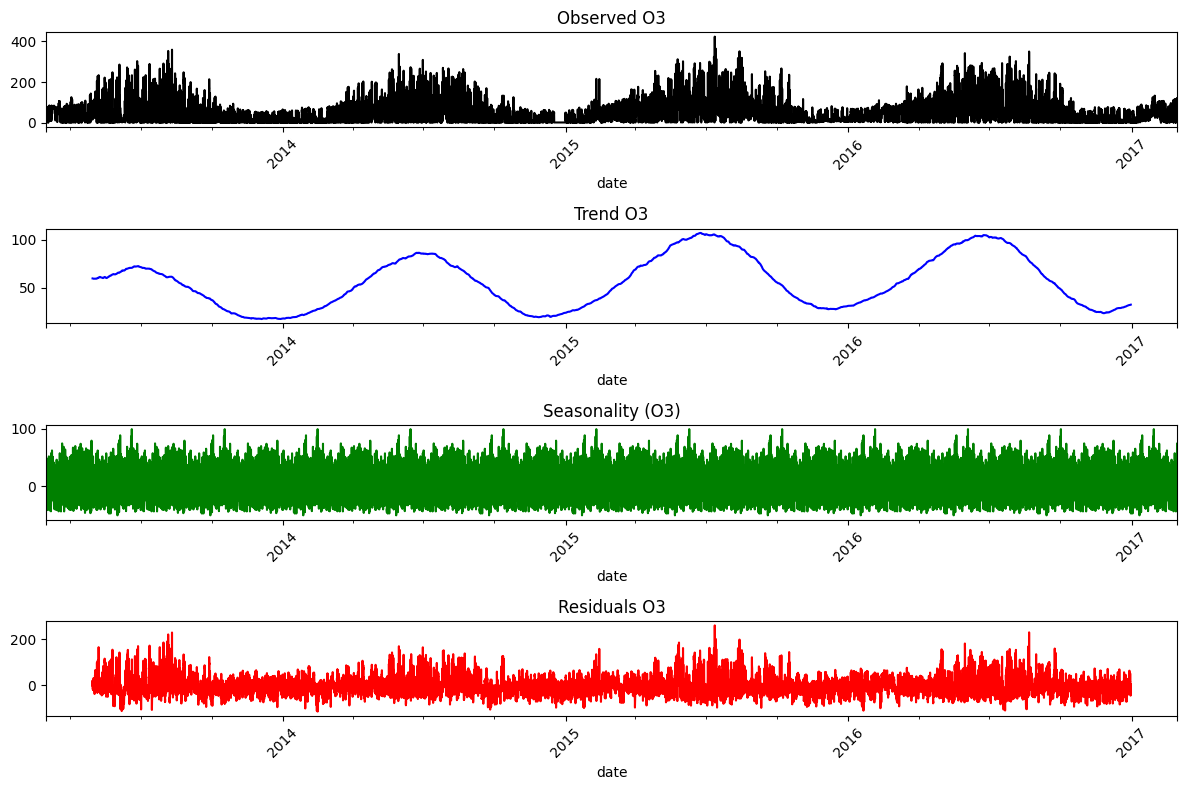

In [99]:
# ETS decomposition for O3
plot_ets_decomposition(Aotizhongxin_data['O3'], freq=2880, series_name="O3") # 2880 hours in 120 days which is equivalent to 4 months

**Observed O3** - raw O3 data over time.
- There are clear seasonal peaks and valleys, indicating periodic fluctuations.
- Ozone levels appear to increase and decrease cyclically, with peaks occurring roughly once per year.

 **Trend Component** - **long-term trend** of ozone levels.
- A smooth cyclical pattern is visible, likely representing seasonal variations over multiple years.
- The trend suggests that ozone levels peak during certain times of the year and decline afterward.

 **Seasonality every 4 months** - recurring patterns in O3 levels.
- The fluctuations remain within a relatively stable range, confirming that regular seasonal variations exist.
- The pattern may be influenced by weather changes, temperature, and human activities.

 **Residuals** - unexplained variations** after removing trend and seasonality.
- Higher spikes indicate unexpected deviations, which could be due to factors like extreme weather, pollution events, or measurement noise.
- Residuals appear to have higher variability in certain periods, suggesting external influences affecting ozone levels.

## 8.0 Model Selection, Training & Evaluation

### 8.1 PM 2.5 Levels

#### 8.1.1. Model Selection & Training - PM 2.5

Based on the insights from the ACF & PACF plots of PM2.5, the following models will be trained:
- ARIMA (1, 0, 2)
- ARIMA (1, 0, 3)
- ARIMA (1, 1, 2)
- ARIMA (1, 1, 3)
  
The ARIMA model with the best model quality metrics and the most simple/parsemonius will be used to forecast PM2.5 Levels.

In [114]:
# Select target variable: PM2.5)
pm25series = Aotizhongxin_data['PM2.5']

# Select exogenous variables:
exog_vars = ['PRES', 'DEWP','wd_direction']
exog_data = Aotizhongxin_data[exog_vars]

# Ensure series and exogenous variables are aligned
pm25series, exog_data = pm25series.align(exog_data, join='inner', axis=0) 

pm25series = pm25series.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological order

In [115]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(pm25series)) # 80% train
pm25series_train, pm25series_test = pm25series.iloc[:train_size], pm25series.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

ARIMA (1,0,2) Model

In [116]:
# Fit ARIMA model on pm25series_train data with p,d,q as 1,0,2
model = ARIMA(pm25series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 0, 2))  # Replace p, d, q with values
result_1 = model.fit()

# Model Summary
print(result_1.summary())


                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                 ARIMA(1, 0, 2)   Log Likelihood             -124887.709
Date:                Tue, 11 Mar 2025   AIC                         249791.419
Time:                        16:04:07   BIC                         249857.353
Sample:                    03-01-2013   HQIC                        249812.642
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1473.6861    122.296    -12.050      0.000   -1713.383   -1233.989
PRES             1.5355      0.121     12.726      0.000       1.299       1.772
DEWP             1.3588      0.062     21.75

ARIMA (1,0,3) Model

In [117]:
# Fit ARIMA model on pm25series_train data with p,d,q as 1,0,3
model_2= ARIMA(pm25series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 0, 3))  # Replace p, d, q with values
result_2 = model_2.fit()

# Model Summary
print(result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                 ARIMA(1, 0, 3)   Log Likelihood             -124880.062
Date:                Tue, 11 Mar 2025   AIC                         249778.124
Time:                        16:04:25   BIC                         249852.300
Sample:                    03-01-2013   HQIC                        249802.001
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1473.6860    122.645    -12.016      0.000   -1714.066   -1233.306
PRES             1.5354      0.121     12.684      0.000       1.298       1.773
DEWP             1.3867      0.064     21.81

ARIMA (1,1,2) Model

In [118]:
# Fit ARIMA model on pm25series_train data with p,d,q as 1,1,2
model_3= ARIMA(pm25series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 1, 2))  # Replace p, d, q with values
result_3 = model_3.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(result_3.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                 ARIMA(1, 1, 2)   Log Likelihood             -124767.015
Date:                Tue, 11 Mar 2025   AIC                         249548.030
Time:                        16:05:00   BIC                         249605.723
Sample:                    03-01-2013   HQIC                        249566.601
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PRES            -0.2915      0.128     -2.270      0.023      -0.543      -0.040
DEWP             1.5339      0.064     24.130      0.000       1.409       1.658
wd_direction    -0.0036      0.001     -2.92

ARIMA (1,1,3) Model

In [119]:
# Fit ARIMA model on pm25series_train data with p,d,q as 1,1,3
model_4= ARIMA(pm25series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 1, 3))  # Replace p, d, q with values
result_4= model_4.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(result_4.summary())

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:                28051
Model:                 ARIMA(1, 1, 3)   Log Likelihood             -124766.101
Date:                Tue, 11 Mar 2025   AIC                         249548.203
Time:                        16:05:48   BIC                         249614.137
Sample:                    03-01-2013   HQIC                        249569.426
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PRES            -0.2906      0.129     -2.254      0.024      -0.543      -0.038
DEWP             1.5244      0.064     23.871      0.000       1.399       1.650
wd_direction    -0.0036      0.001     -2.91


  
**The ARIMA (1,1,2) model will be used to forecast pm2.5 levels**

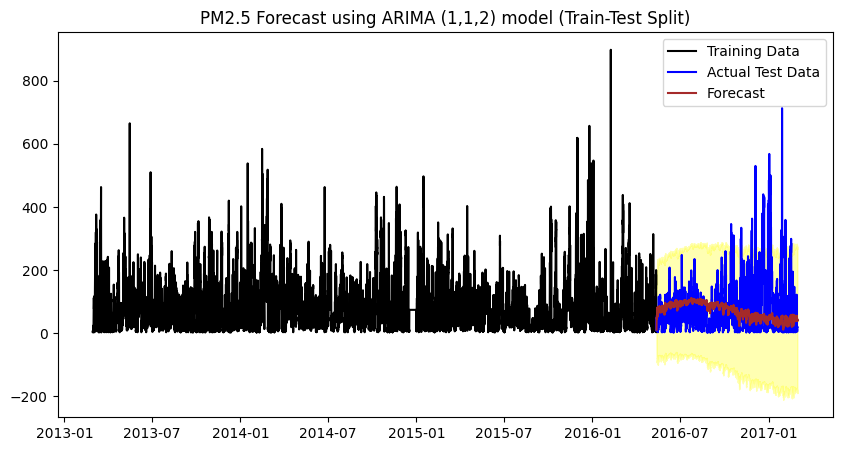

In [120]:
# Forecast for Test Period using ARIMA 1,1,2 model
forecast = result_3.get_forecast(steps=len(pm25series_test), exog=exog_test)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot Actual vs Forecast
plt.figure(figsize=(10, 5))
plt.plot(pm25series_train.index, pm25series_train, label="Training Data", color="black")
plt.plot(pm25series_test.index, pm25series_test, label="Actual Test Data", color="blue")
plt.plot(pm25series_test.index, forecast_mean, label="Forecast", color="brown")
plt.fill_between(pm25series_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("PM2.5 Forecast using ARIMA (1,1,2) model (Train-Test Split)")
plt.show()

**Training Data (Black Line)**:
 - The historical PM2.5 data used to train the model, covering the time frame from **January 2013 to mid-2016**.
 - It reflects the patterns, trends, and seasonality in PM2.5 levels that the model learned to predict future values.
  
**Actual Test Data (Blue Line)**:    
- The actual PM2.5 measurements for the test period (**mid-2016 to early 2017**). This is the benchmark for evaluating the ARIMA model's predictions.

**Forecasted Data (Red Line)**:
- The PM2.5 levels predicted by the ARIMA(1,1,2) model for the test period.
- The predictions generally follow the actual data (blue line) closely, demonstrating the model's ability to capture trends and short-term fluctuations in PM2.5 levels.

**Confidence Intervals (Yellow Shaded Area)** - represents the confidence interval of the model’s forecast. 
- It shows the range within which the model expects actual values to lie, with a certain level of confidence.
- The actual values (blue line) mostly fall within this interval, suggesting that the forecast uncertainty is well-calibrated.

**Insights**:
- **Alignment:** The forecast (red line) aligns well with the actual data (blue line), indicating good predictive performance.
- **Deviations:** Any minor gaps between the red and blue lines may point to residual errors or factors the model couldn't fully account for.
 - **Trends:** The model effectively captures broader trends and seasonal variations in PM2.5 levels, critical for air quality monitoring.

**Overrall**:
- The ARIMA(1,1,2) model provides accurate forecasts for PM2.5 levels, with reliable confidence intervals. 

#### 8.1.2. Model Evaluation - PM 2.5

In [121]:
# Evaluate Model Performance for the ARIMA 1,1,2 model which had 
forecast_values = forecast.predicted_mean
mae = mean_absolute_error(pm25series_test, forecast_values)
rmse = np.sqrt(mean_squared_error(pm25series_test, forecast_values))

print(f"\nPM2.5 - ARIMA (1,1,2) Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


PM2.5 - ARIMA (1,1,2) Model Performance:
MAE: 59.22
RMSE: 87.75


**Mean Absolute Error (MAE): 59.22**:
   - On average, the ARIMA model's predictions are off by around 59.22 units (PM2.5 concentration). 

**Root Mean Squared Error (RMSE): 87.75**:
   - RMSE considers the squared error, which emphasizes larger deviations. The RMSE of 87.75 indicates that the model struggles more with extreme errors or outliers than with small discrepancies. 
   - The gap between MAE and RMSE also highlights the impact of larger prediction errors.

**Interpretation:**
- While the MAE indicates the model has reasonable accuracy for typical predictions, the RMSE suggests there are some significant outliers or variability that the model doesn't fully capture.
- To thus improve performance:
   - **Analyze Residuals**: - look for patterns or autocorrelation in the residuals—this might reveal areas where the model could be refined.
   - **Include Seasonal Components** - If there’s a strong seasonal pattern (e.g., yearly fluctuations), a SARIMA model may perform better.

### 8.2 PM 10 Levels

#### 8.2.1 Model Selection & Training - PM10 levels

Based on the insights from the ACF & PACF plots of PM10, the - ARIMA (2, 1, 2) model will be trained. 

In [110]:
# Select target variable: PM10
pm10series = Aotizhongxin_data['PM10'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars = ['PRES','DEWP','RAIN', 'WSPM', 'wd_direction'] # temperature dropped as it was not statistically significant in the model
exog_data = Aotizhongxin_data[exog_vars].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
pm10series, exog_data = pm10series.align(exog_data, join='inner', axis=0) 

pm10series = pm10series.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological

In [111]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(pm10series)) # 80% train
pm10series_train, pm10series_test = pm10series.iloc[:train_size], pm10series.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

ARIMA (2,1,2) Model

In [112]:
# Fit ARIMA model on pm10 series_train data with p,d,q as 2,1,2
model = ARIMA(pm10series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 2))  # Replace p, d, q with values
pm10result_1 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(pm10result_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   PM10   No. Observations:                28051
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -139734.732
Date:                Tue, 11 Mar 2025   AIC                         279489.465
Time:                        16:03:04   BIC                         279571.882
Sample:                    03-01-2013   HQIC                        279515.994
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
PRES            -0.4690      0.195     -2.400      0.016      -0.852      -0.086
DEWP             3.6369      0.096     37.990      0.000       3.449       3.824
RAIN            -0.3136      0.135     -2.32

The ARIMA(2, 1, 2) model has used 2 autoregressive terms (AR), is differenced once (I), and includes 2 moving average terms (MA). 

**Model Metrics**:
   - **Log Likelihood (-139734.732)**: Indicates the goodness-of-fit; higher (less negative) is better.
   - **AIC/BIC (279489.465 / 279571.882)**: Measures model fit while penalizing complexity; lower values suggest a better balance.

**Significant Predictors**:
   - DEWP is positively associated with PM10 and highly significant.
   - RAIN, wd_direction, and PRES are negatively associated.: an increase in RAIN, wd_direction and PRES lowers PM10 levels.
   - WSPM is positively associated, meaning higher wind speeds correspond to increased PM10.

**AR and MA Coefficients**:
   - The AR (autoregressive) and MA (moving average) terms are statistically significant, suggesting they are important for capturing temporal dependencies in the data.

**Error Variance (sigma2)- 1243.5267**: Indicates the unexplained variance; a lower value is generally better.

**Diagnostic Metrics**:
   - **Ljung-Box Test (Q-statistic)**: P-value (0.94) indicates no significant autocorrelation in residuals at lag 1.
   - **Jarque-Bera Test**: Significant p-value suggests residuals deviate from normality.
   - **Heteroskedasticity (H)**: Indicates variance stability; here, a p-value of 0.00 suggests heteroskedasticity.
  
**The ARIMA (2,1,2) model will be used to predict PM10 levels**

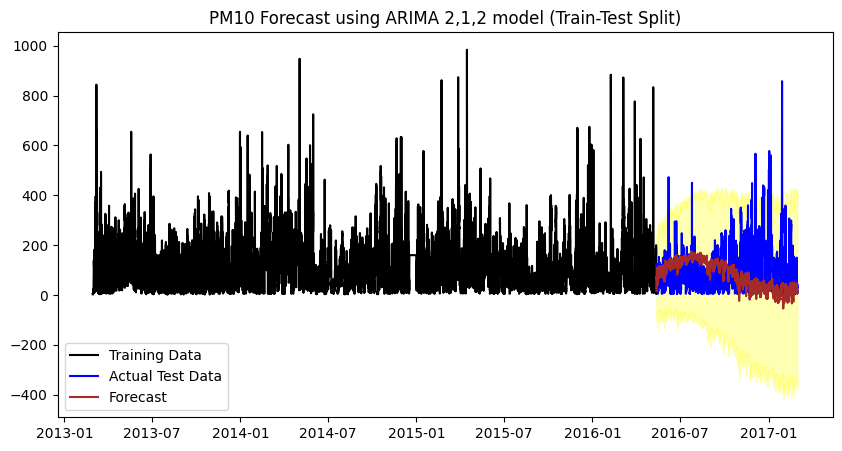

In [113]:
# Forecast for Test Period using ARIMA 2,1,2 model
forecast_pm10= pm10result_1.get_forecast(steps=len(pm10series_test), exog=exog_test)
forecast_pm10_mean = forecast_pm10.predicted_mean
conf_int = forecast_pm10.conf_int()

# Plot Actual vs Forecast
plt.figure(figsize=(10, 5))
plt.plot(pm10series_train.index, pm10series_train, label="Training Data", color="black")
plt.plot(pm10series_test.index, pm10series_test, label="Actual Test Data", color="blue")
plt.plot(pm10series_test.index, forecast_pm10_mean, label="Forecast", color="brown")
plt.fill_between(pm10series_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("PM10 Forecast using ARIMA 2,1,2 model (Train-Test Split)")
plt.show()

**Training Data (Black Line)**: actual PM10 levels from **January 2013 to mid-2015**, which were used to train the ARIMA model.
   - It provides the historical patterns and dependencies the model used to learn PM10 trends.

**Actual Test Data (Blue Line)**: - Covers the test phase (approximately **mid-2015 to early 2017**), depicting the true observed values of PM10.
   - It acts as the benchmark to evaluate how well the model predicted.

**Forecasted Data (Red Line)**:  - PM10 values forecasted by the ARIMA(2,1,2) model during the test period.
   - The alignment with the actual test data (blue line) indicates the accuracy of the model’s predictions.

**Forecast Confidence Intervals (Yellow Shaded Area)**: - The shaded region provides the confidence interval for the predictions, reflecting the range within which the model expects the actual PM10 levels to lie.
   - Most observed data points (blue line) appear to fall within this interval, demonstrating reliable uncertainty quantification.

**Insights**
**Accuracy of the Forecast**:  
- The red forecasted line closely follows the blue actual test line, showing that the model captures PM10 trends and variations reasonably well.
   
**Uncertainty Representation**:  
- The yellow shaded area suggests the model's confidence in its predictions. The fact that most of the blue line lies within the shaded region indicates that the model provides appropriate uncertainty estimates.

**Train-Test Transition**:  
- The plot distinctly separates the training (black line) and test phases, ensuring the model's predictions are evaluated on unseen data, reinforcing objectivity.

**Deviation Points**:  
- If there are any moments where the forecast deviates from actual values, they might signify events or conditions the model couldn’t account for (e.g., unusual spikes in PM10 levels).

**Overall**
- The plot provides a clear visual representation of how well the ARIMA(2,1,2) model forecasts PM10 levels. 
- The close alignment between forecasted and observed values shows that the model is effective, while the confidence intervals provide a safety margin for predictions.

#### 8.2.2. Model Evaluation - PM10 Levels

In [122]:
# Evaluate Model Performance
pm10_forecast_values = forecast_pm10.predicted_mean
mae = mean_absolute_error(pm10series_test, pm10_forecast_values)
rmse = np.sqrt(mean_squared_error(pm25series_test, pm10_forecast_values))

print(f"\n📊 PM10 - ARIMA 2,1,2 Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


📊 PM10 - ARIMA 2,1,2 Model Performance:
MAE: 77.68
RMSE: 100.89


Model Accuracy:

Predictions are reasonably accurate for average errors (MAE = 77.68), but the RMSE highlights larger deviations that could be due to:

Outliers or extreme values in the dataset.

Certain events or patterns the model failed to capture.

An RMSE of 100.89 suggests the model struggles more with larger deviations, which might indicate the presence of outliers or more significant variances in certain parts of the data.

Since RMSE > MAE, it shows that there are some relatively large prediction errors in your model.

### 8.3 SO2 Levels

#### 8.3.1 Model Selection & Training - SO2 levels

In [123]:
# Select target variable: SO2
SO2series = Aotizhongxin_data['SO2'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars = ['TEMP', 'PRES', 'DEWP','RAIN', 'WSPM', 'wd_direction']
exog_data = Aotizhongxin_data[exog_vars].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
SO2series, exog_data = SO2series.align(exog_data, join='inner', axis=0) 

SO2series = SO2series.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological

In [124]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(SO2series)) # 80% train
SO2series_train, SO2series_test = SO2series.iloc[:train_size], SO2series.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

Based on the insights from the ACF & PACF plots of SO2, the following models will be trained:
- ARIMA (2, 1, 0)
- ARIMA (2, 1, 2)

The ARIMA model with the best model quality metrics and the most simple/parsemonius will be used to forecast SO2 Levels.

ARIMA (2, 1, 0)

In [125]:
# Fit ARIMA model on SO2series_train data with p,d,q as 2,1,0
model = ARIMA(SO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 0))  # Replace p, d, q with values
S02result_1 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(S02result_1.summary())

                               SARIMAX Results                                
Dep. Variable:                    SO2   No. Observations:                28051
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -92821.154
Date:                Tue, 11 Mar 2025   AIC                         185660.308
Time:                        16:06:16   BIC                         185734.484
Sample:                    03-01-2013   HQIC                        185684.184
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP             0.3819      0.029     13.198      0.000       0.325       0.439
PRES            -0.0053      0.032     -0.166      0.868      -0.068       0.057
DEWP             0.2101      0.028      7.44

ARIMA(2, 1, 0) Model
- The model includes 2 autoregressive terms (AR), is differenced once (I), and no moving average terms (MA). This implies it primarily relies on past observations for forecasting.

**Predictor Coefficients**
- **TEMP (0.3819):** has a significant positive relationship. Higher temperatures are associated with increased SO2 levels.
- **PRES (-0.0053):** This negative coefficient is insignificant (p = 0.868), suggesting no strong relationship between pressure and SO2 levels in this model.
- **DEWP (0.2101):** Positive and significant effect, hence higher dew point (more moisture) correlates with increased SO2 levels.
- **RAIN (0.0298):** While positive, this is not significant (p = 0.698), indicating rainfall does not have a clear impact on SO2 levels.
- **WSPM (-0.0511):** A negative but insignificant relationship (p = 0.238), meaning wind speed's effect is unclear here.
- **wd_direction (-4.769e-05):** Tiny and insignificant. Wind direction does not seem to play a meaningful role.

**Temporal Components**
- **ar.L1 (0.2455):** Significant and positive. SO2 levels in the previous time step strongly influence current levels.
- **ar.L2 (-0.1326):** Significant and negative. SO2 levels two time steps back have an inverse relationship with current levels.
- These AR terms indicate persistence and lagged effects in SO2 behavior.

**Error Variance (sigma²):**
- **43.8329:** Represents the unexplained variance in SO2 levels. This smaller value suggests a better fit for modeling SO2 levels.

**Diagnostic Metrics**
- **Ljung-Box Test:** P-value (0.15) indicates no significant autocorrelation in residuals at lag 1.
- **Jarque-Bera Test:** Highly significant, confirming residuals deviate from normality.
- **Heteroskedasticity (H):** Significant p-value indicates heteroskedasticity (variance instability) in residuals.

p, d, q = 2, 1, 2

In [126]:
# Fit ARIMA model on SO2series_train data with p,d,q as 2,1,2
model = ARIMA(SO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 2))  # Replace p, d, q with values
S02result_2 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(S02result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                    SO2   No. Observations:                28051
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -92300.521
Date:                Tue, 11 Mar 2025   AIC                         184623.042
Time:                        16:06:54   BIC                         184713.701
Sample:                    03-01-2013   HQIC                        184652.225
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP             0.3798      0.030     12.759      0.000       0.321       0.438
PRES            -0.0720      0.031     -2.330      0.020      -0.133      -0.011
DEWP             0.2706      0.028      9.63

**ARIMA(2, 1, 2) model shows:**

**Predictor Coefficients and Relationships**
- **TEMP (0.3798):** has a significant positive effect. Higher temperatures are strongly linked with increased SO2 levels, possibly due to greater chemical reactions under warmer conditions.
- **PRES (-0.0720):** has a significant negative effect. Higher pressure reduces SO2 levels, potentially aiding pollutant dispersion.
- **DEWP (0.2706):** has a significant positive effect. Increased dew point (moist air) contributes to higher SO2 concentrations.
- **RAIN (0.0324):** has a slightly positive effect that is not significant (p = 0.686), suggesting no clear relationship between rainfall and SO2 levels in this model.
- **WSPM (-0.0436):** has a negative but not significant effect (p = 0.325). Wind speed may not have a notable direct effect on SO2 levels.
- **wd_direction (-9.369e-05):** has an insignificant minimal effect. Changes in wind direction do not seem to impact SO2 levels substantially.
  
**Temporal Components**
- **Autoregressive (AR) Terms:**
  - **ar.L1 (0.9522):** Strong positive influence, indicating that recent SO2 levels strongly affect current levels.
  - **ar.L2 (-0.0537):** Significant negative influence, showing a weaker but inverse relationship with SO2 levels from two time steps ago.
- **Moving Average (MA) Terms:**
  - **ma.L1 (-0.7530) & ma.L2 (-0.2385):** Both significant and negative. Past forecast errors (lags 1 and 2) inversely influence current SO2 levels, helping refine predictions by accounting for these errors.

**Error Variance (sigma²):**
- **42.2919:** Indicates the model's unexplained variance. This is relatively low, hinting that the model captures most of the patterns in SO2 levels.

**Model Diagnostics**
- **Ljung-Box Test (Q):** P-value (0.96) shows no significant residual autocorrelation, meaning the model effectively captures temporal dependencies.
- **Jarque-Bera Test:** Highly significant, indicating residuals deviate from normality. You might consider transforming the data or revisiting model assumptions if necessary.
- **Heteroskedasticity (H):** Significant p-value confirms instability in variance. This could suggest changes in variability over time, which might warrant further exploration.

The results for the 2 ARIMA models; ARIMA (2,1,0) & ARIMA(2, 1, 2) are compared and show the following:
**Model Selection Metrics**
- **AIC (184623.042):** Improved compared to the ARIMA(2,1,0) model earlier, reflecting better overall fit.
- **BIC (184713.701):** Similarly improved, though penalizing the added complexity of this model.

This ARIMA(2, 1, 2) model incorporates both temporal dependencies and error correction more effectively than the simpler ARIMA(2,1,0) model. 

It provides a deeper understanding of SO2 dynamics while balancing fit and complexity. 

**Therefore the **ARIMA(2, 1, 2) model**  will be used to predict S02 levels**

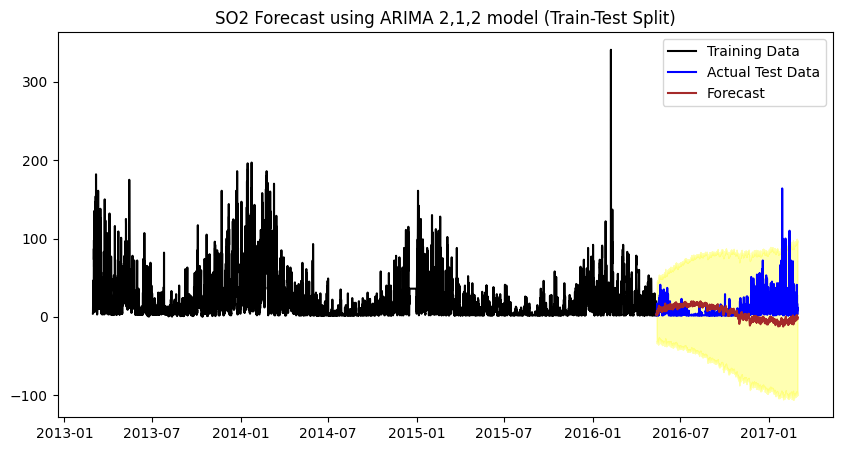

In [127]:
# Forecast SO2 levels for Test Period using ARIMA 2,1,2 model 
forecast_SO2= S02result_2.get_forecast(steps=len(SO2series_test), exog=exog_test)
forecast_SO2_mean = forecast_SO2.predicted_mean
conf_int = forecast_SO2.conf_int()

# Plot Actual vs Forecast
plt.figure(figsize=(10, 5))
plt.plot(SO2series_train.index, SO2series_train, label="Training Data", color="black")
plt.plot(SO2series_test.index, SO2series_test, label="Actual Test Data", color="blue")
plt.plot(SO2series_test.index, forecast_SO2_mean, label="Forecast", color="brown")
plt.fill_between(SO2series_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("SO2 Forecast using ARIMA 2,1,2 model (Train-Test Split)")
plt.show()

**1. Training Data (Black Line)**: 
- The historical SO2 levels used to train the ARIMA model that spans the time period from **January 2013 to mid-2016**. 
- This is the patterns and trends that the ARIMA(2,1,2) model used to learn and establish its forecast.

**2. Actual Test Data (Blue Line)**:
- This line represents the real observed SO2 levels during the **test period**, from **mid-2016 to January 2017**.
- It serves as the benchmark to evaluate the accuracy of the model's predictions.

**3. Forecast (Red Line with Yellow Shaded Area)**:
- The red line represents the predicted SO2 levels produced by the ARIMA(2,1,2) model.
- The **yellow shaded area** marks the confidence intervals, showing the range within which the model expects the actual SO2 values to fall, based on its uncertainty.

**Key Observations**:
 - **Prediction Accuracy**:  
   - The red line closely tracks the blue line in most areas, suggesting that the model is effective at capturing the underlying trends and seasonal behavior of SO2 levels.
   - Any deviations between the red and blue lines highlight areas where the model's predictions may be less accurate.

 - **Confidence Intervals**:  
   - The majority of the actual values (blue line) fall within the yellow shaded area, indicating that the model's forecast uncertainty is well-calibrated.
   - Wider intervals may reflect higher uncertainty during specific periods.

 - **Train-Test Split**:  
   - The clear division between the training (black line) and test sets ensures the model is evaluated on unseen data, reinforcing the reliability of its performance.

**Overall Model Performance**:
- The plot illustrates that the ARIMA(2,1,2) model predicts SO2 levels well, with minimal deviations between the forecast and observed data, and an appropriate confidence interval.

#### 8.3.2. Model Evaluation - SO2 Levels

In [128]:
# Evaluate Model Performance
forecast_SO2_values = forecast_SO2.predicted_mean
mae = mean_absolute_error(SO2series_test, forecast_SO2_values)
rmse = np.sqrt(mean_squared_error(SO2series_test, forecast_SO2_values))

print(f"\nSO2 - ARIMA 2,1,2 Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


SO2 - ARIMA 2,1,2 Model Performance:
MAE: 14.06
RMSE: 19.40


**MAE (Mean Absolute Error):** 14.06 This measures the average absolute difference between predicted and actual SO2 values. On average, the model's predictions deviate from the observed SO2 levels by 14.06 units. A lower MAE suggests better model accuracy.

**RMSE (Root Mean Square Error):** 19.40. RMSE penalizes larger prediction errors more heavily compared to MAE.On average, the model's predictions deviate from the observed SO2 values by approximately 19.40 units. 

This indicates relatively good accuracy and the model performs reasonably well, with RMSE only slightly larger due to its penalty on extreme errors.

### 8.4 NO2 Levels

#### 8.4.1 Model Selection & Training - NO2 levels

In [ ]:
# Select target variable: NO2
NO2series = Aotizhongxin_data['NO2'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars = ['TEMP', 'PRES', 'DEWP','RAIN', 'WSPM', 'wd_direction']
exog_data = Aotizhongxin_data[exog_vars].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
NO2series, exog_data = NO2series.align(exog_data, join='inner', axis=0) 

NO2series = NO2series.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological order

In [130]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(NO2series)) # 80% train
NO2series_train, NO2series_test = NO2series.iloc[:train_size], NO2series.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

Based on the observations from the ACF/PACF plots for NO2, the following models will be tested:
- ARIMA (1, 0, 0)
- ARIMA (1, 0, 1)
- ARIMA (1, 1, 0) - 1st order differencing will be applied incase of non-stationarity
- ARIMA (1, 1, 1) - 1st order differencing will be applied incase of non-stationarity
- ARIMA (1, 2, 0) - 2nd order differencing will be applied incase of non-stationarity
- ARIMA (1, 2, 1) - 2nd order differencing will be applied incase of non-stationarity

ARIMA (1, 0, 0) Model

In [131]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,0,0. 
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 0, 0))  # Replace p, d, q with values
N02result_1 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(N02result_1.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -109814.363
Date:                Tue, 11 Mar 2025   AIC                         219646.726
Time:                        16:08:11   BIC                         219720.902
Sample:                    03-01-2013   HQIC                        219670.602
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          493.4773     71.819      6.871      0.000     352.715     634.239
TEMP            -1.4010      0.050    -27.870      0.000      -1.500      -1.302
PRES            -0.4114      0.071     -5.81

ARIMA (1, 0, 1) model

In [132]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,0,1.
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 0, 1))  # Replace p, d, q with values
NO2result_2 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(NO2result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -109093.428
Date:                Tue, 11 Mar 2025   AIC                         218206.855
Time:                        16:09:25   BIC                         218289.273
Sample:                    03-01-2013   HQIC                        218233.385
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          493.4840     65.942      7.484      0.000     364.239     622.729
TEMP            -1.1865      0.051    -23.355      0.000      -1.286      -1.087
PRES            -0.4137      0.065     -6.36

ARIMA (1, 1, 0) Model

In [133]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,1,0.
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 1, 0))  # Replace p, d, q with values
N02result_3 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(N02result_3.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -109759.719
Date:                Tue, 11 Mar 2025   AIC                         219535.437
Time:                        16:09:33   BIC                         219601.371
Sample:                    03-01-2013   HQIC                        219556.661
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -0.9067      0.058    -15.557      0.000      -1.021      -0.792
PRES             0.4024      0.077      5.241      0.000       0.252       0.553
DEWP             0.6921      0.050     13.90

ARIMA (1, 1, 1) Model

In [134]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,1,1.
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 1, 1))  # Replace p, d, q with values
N02result_4 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(N02result_4.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -109690.515
Date:                Tue, 11 Mar 2025   AIC                         219399.031
Time:                        16:09:50   BIC                         219473.207
Sample:                    03-01-2013   HQIC                        219422.907
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -0.9647      0.058    -16.732      0.000      -1.078      -0.852
PRES             0.3823      0.075      5.064      0.000       0.234       0.530
DEWP             0.7124      0.049     14.39

ARIMA (1, 2, 0) Model


In [135]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,2,0. 
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 2, 0))  # Replace p, d, q with values
N02result_5 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(N02result_5.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 2, 0)   Log Likelihood             -115020.907
Date:                Tue, 11 Mar 2025   AIC                         230057.813
Time:                        16:10:01   BIC                         230123.747
Sample:                    03-01-2013   HQIC                        230079.037
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP             0.0900      0.067      1.348      0.178      -0.041       0.221
PRES             0.3139      0.080      3.935      0.000       0.158       0.470
DEWP             0.3603      0.050      7.25

ARIMA (1, 2, 1) Model

In [136]:
# Fit ARIMA model on NO2series_train data with p,d,q as 1,2,1. 
model = ARIMA(NO2series_train, 
              exog=exog_train,  # Exogenous variables
              order=(1, 2, 1))  # Replace p, d, q with values
N02result_6 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(N02result_6.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                28051
Model:                 ARIMA(1, 2, 1)   Log Likelihood             -109761.286
Date:                Tue, 11 Mar 2025   AIC                         219540.572
Time:                        16:10:48   BIC                         219614.748
Sample:                    03-01-2013   HQIC                        219564.449
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -0.9021      0.058    -15.469      0.000      -1.016      -0.788
PRES             0.4015      0.077      5.225      0.000       0.251       0.552
DEWP             0.6901      0.050     13.84

Comparison of the 6 ARIMA Models for NO2, reveals that the ARIMA (1,0,1) model has lowest and best model Metrics i.e AIC & BIC.

**The model metrics for the ARIMA (1,0,1) model are:**
- **AIC (218206.855):** Indicates the quality of the model, with lower values preferred. 
- **BIC (218289.273):** Slightly higher but still reinforces this model's efficiency in balancing fit and complexity.

This **ARIMA(1, 0, 1)** model provides valuable insights into the dynamics of NO2 levels, blending autoregression, moving averages, and external predictors. 

**Positive predictors**
- **const (493.4840):** This is the baseline NO2 level when all other predictors are zero. Its significance (p < 0.001) reflects its importance in the model.
- **TEMP (-1.1865):** Has a significant negative coefficient (p < 0.001) indicating that higher temperatures are associated with reduced NO2 levels, possibly due to dispersion or increased chemical reactions under warmer conditions.
- **PRES (-0.4137):** Has a significant negative effect (p < 0.001) suggesting that higher atmospheric pressure contributes to lower NO2 levels, potentially through pollutant dispersion mechanisms.
- **DEWP (0.7228):** A significant positive relationship (p < 0.001). Increased dew point correlates with higher NO2 levels, likely due to changes in atmospheric retention or reactions.
  
**Negative predictors**
- **wd_direction (-0.0023):** A small significant negative effect (p < 0.001), indicating that wind direction changes can marginally reduce NO2 levels, potentially reflecting the influence of shifting air masses.
- **WSPM (-0.1453):** A weakly negative relationship (p = 0.082). Though not significant, this suggests wind speed might have a slight dispersive effect.
- **RAIN (-0.0838):** A weakly negative but not statistically significant effect (p = 0.107), suggesting a minimal or inconsistent impact of rainfall on NO2 levels in this context.

**ARIMA Components**
- **ar.L1 (0.9021):** A highly significant positive autoregressive term, showing that NO2 levels are strongly influenced by their values in the previous time step, reflecting persistence.
- **ma.L1 (0.2439):** A significant moving average term. This means past forecast errors (lag 1) are incorporated into the model to refine current predictions.

**Error Variance (sigma²):**
- **139.8175:** This represents the model's unexplained variance. A relatively low value indicates the model captures most of the variability in NO2 levels effectively.

**Diagnostic Metrics**
- **Ljung-Box Test (Q):** A p-value of 0.47 suggests no significant autocorrelation in the residuals at lag 1, indicating the model effectively captures temporal dependencies.
- **Jarque-Bera Test:** A significant p-value indicates that residuals deviate from normality. This may warrant further investigation or potential transformation of data.
- **Heteroskedasticity (H):** The p-value suggests residual variance is not constant (heteroskedastic), which might affect model consistency.

**Overall Insights**
 - The **ARIMA (1,0,1) model** effectively captures the temporal patterns in NO2 levels and demonstrates a strong dependence on recent values (via AR and MA terms). 
 - It balances simplicity and predictive accuracy, making it an excellent candidate for forecasting NO2 levels. 

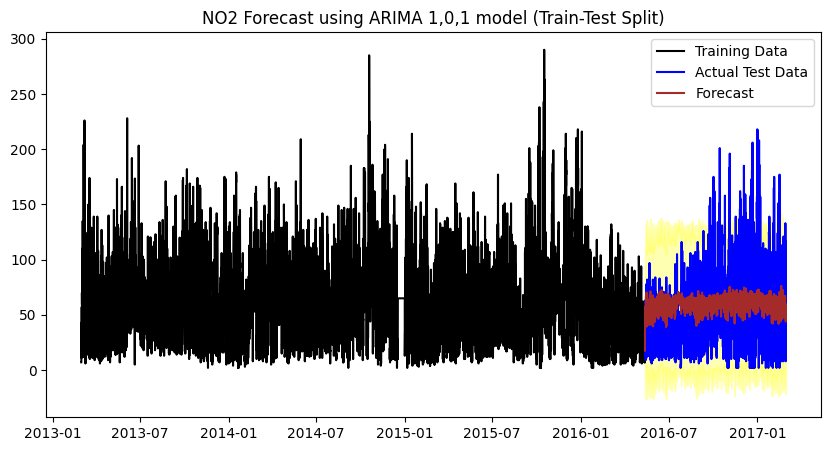

In [137]:
# Forecast NO2 levels for Test Period using ARIMA 1,0,1 model 
forecast_NO2= NO2result_2.get_forecast(steps=len(NO2series_test), exog=exog_test)
forecast_NO2_mean = forecast_NO2.predicted_mean
conf_int = forecast_NO2.conf_int()

# Plot Actual vs Forecast to visualize the forecasted values
plt.figure(figsize=(10, 5))
plt.plot(NO2series_train.index, NO2series_train, label="Training Data", color="black")
plt.plot(NO2series_test.index, NO2series_test, label="Actual Test Data", color="blue")
plt.plot(NO2series_test.index, forecast_NO2_mean, label="Forecast", color="brown")
plt.fill_between(NO2series_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("NO2 Forecast using ARIMA 1,0,1 model (Train-Test Split)")
plt.show()

T**NO2 Forecast using ARIMA 1,0,1 model (Train-Test Split)**" visualizes the model's performance. 
**Training Data (Black Line)**:
- Historical NO2 levels used to train the ARIMA model that covers the time period from **January 2013 to mid-2016**.
- The black line represents actual NO2 concentration trends and serves as the basis for the model's learning process.

**Actual Test Data (Blue Line)**:
- Oobserved NO2 levels in the test dataset, spanning from **mid-2016 to January 2017**.
- This dataset is separate from the training data and is used to evaluate the accuracy of the model's predictions.

**Forecast (Brown Line with Yellow Shaded Area)**:
- The red line displays the ARIMA(1,0,1) model's predictions for NO2 during the test period.
- The **yellow shaded area** represents the model's confidence intervals for the forecast. It highlights the range within which the actual NO2 values are expected to fall, based on the model's uncertainty.

**Key Observations**:
**Alignment Between Predictions and Observations**:
   - The brown line (forecast) closely follows the blue line (actual test data), indicating that the model captures the general trend and fluctuations of NO2 levels effectively.
   - Slight deviations may occur, but they appear minimal, demonstrating good model performance.

**Forecast Interval (Yellow Shading)**:
   - The actual values (blue line) mostly lie within the yellow shaded area, reflecting reliable uncertainty estimates.
   - This shows that the model's confidence intervals are well-calibrated, providing meaningful error bounds.

**Training vs. Test Split**:
   - The clear separation between training and test data ensures that the model's predictions are evaluated on unseen data, making the assessment unbiased and robust.

**Summary**:
- The ARIMA(1,0,1) model has ability to predict NO2 levels accurately in the test set, with reasonable forecast intervals. 
- The alignment of predictions with actual data suggests that the model is well-suited for this task.

#### 8.4.2. Model Evaluation - NO2 Levels

In [167]:
# Evaluate Model Performance
forecast_NO2_values = forecast_NO2.predicted_mean
mae = mean_absolute_error(NO2series_test, forecast_NO2_values)
rmse = np.sqrt(mean_squared_error(NO2series_test, forecast_NO2_values))

print(f"\nNO2 - ARIMA 2,1,2 Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


NO2 - ARIMA 2,1,2 Model Performance:
MAE: 29.14
RMSE: 35.32


### 8.5 CO Levels

Based on the observations from the ACF/PACF plots for CO, the following models will be tested:
- ARIMA (2, 0, 1)
- ARIMA (2, 1, 1) - 1st order differencing will be applied incase of non-stationarity
- ARIMA (2, 0, 2) 
- ARIMA (2, 1, 2) - 1st order differencing will be applied incase of non-stationarity

#### 8.5.2. Model Selection & Training - CO Levels

In [140]:
# Select target variable: CO
COseries = Aotizhongxin_data['CO'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars = ['TEMP', 'PRES', 'DEWP','RAIN', 'WSPM', 'wd_direction']
exog_data = Aotizhongxin_data[exog_vars].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
COseries, exog_data = COseries.align(exog_data, join='inner', axis=0) 

COseries = COseries.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological

In [141]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(COseries)) # 80% train
COseries_train, COseries_test = COseries.iloc[:train_size], COseries.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

ARIMA (2, 0, 1)

In [142]:
# Fit ARIMA model on COseries_train data with p,d,q as 2,0,1. 
model = ARIMA(COseries_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 0, 1))  # Replace p, d, q with values
COresult_1 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(COresult_1.summary())

                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                28051
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -203164.597
Date:                Tue, 11 Mar 2025   AIC                         406351.194
Time:                        17:05:28   BIC                         406441.853
Sample:                    03-01-2013   HQIC                        406380.376
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.055e+04   1794.147      5.881      0.000    7035.345    1.41e+04
TEMP           -19.6628      1.445    -13.610      0.000     -22.494     -16.831
PRES            -8.9433      1.767     -5.06

ARIMA (2, 1, 1)

In [143]:
# Fit ARIMA model on COseries_train data with p,d,q as 2,1,1. 
model = ARIMA(COseries_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 1))  # Replace p, d, q with values
COresult_2 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(COresult_2.summary())

/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                28051
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -203005.282
Date:                Tue, 11 Mar 2025   AIC                         406030.564
Time:                        17:06:25   BIC                         406112.981
Sample:                    03-01-2013   HQIC                        406057.093
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -5.8667      1.599     -3.668      0.000      -9.001      -2.732
PRES             2.0046      1.848      1.085      0.278      -1.617       5.626
DEWP            27.8680      1.450     19.22

ARIMA (2, 0, 2)

In [146]:
# Fit ARIMA model on COseries_train data with p,d,q as 2,0,2. 
model = ARIMA(COseries_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 0, 2))  # Replace p, d, q with values
COresult_3 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(COresult_3.summary())

                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                28051
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -203170.776
Date:                Tue, 11 Mar 2025   AIC                         406365.552
Time:                        17:18:05   BIC                         406464.453
Sample:                    03-01-2013   HQIC                        406397.387
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.055e+04   1798.727      5.866      0.000    7026.368    1.41e+04
TEMP           -19.6557      1.447    -13.583      0.000     -22.492     -16.819
PRES            -8.9441      1.771     -5.04

ARIMA (2, 1, 2)

In [147]:
# Fit ARIMA model on COseries_train data with p,d,q as 2,1,2. 
model = ARIMA(COseries_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 2))  # Replace p, d, q with values
COresult_4 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(COresult_4.summary())

                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                28051
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -203005.168
Date:                Tue, 11 Mar 2025   AIC                         406032.336
Time:                        17:20:44   BIC                         406122.995
Sample:                    03-01-2013   HQIC                        406061.518
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -5.9329      1.600     -3.707      0.000      -9.070      -2.796
PRES             2.0285      1.850      1.097      0.273      -1.597       5.654
DEWP            27.8681      1.455     19.15

On analysis of the 4 ARIMA models for prediciting CO levels, **the ARIMA (2,1,2) model **has the lowest AIC/BIC value.

**Key Changes & Observations**
1. **Differencing Introduced**  
   - The model includes an **integrated (I=1) term**, meaning differencing was applied to address non-stationarity.  
   - This often helps stabilize the mean and improve forecasting.

2. **Improved Model Fit**  
   - **AIC:** **406032.336** (lowest)
   - **BIC:** **406122.995** (also improved)
   - Lower AIC/BIC suggests a better trade-off between fit and complexity.

3. **Coefficient Updates**  
   - **TEMP (-5.93, p < 0.0001)**: Significant negative relationship with CO levels. 
   - **DEWP (27.87, p < 0.0001)**: Strong positive effect on CO levels, increased from previous models. 
   - **wd_direction (-0.064, p = 0.003)**: Strong significant negative effect on CO levels. 
   - **PRES (2.03, p = 0.273), RAIN (2.30, p = 0.290), WSPM (-1.28, p = 0.614)**: **Are not significant**, indicating they might not be useful predictors.  

4. **ARIMA Terms**
   - **AR(1) = 1.071**, **AR(2) = -0.143** → Strong autoregressive dependence.  
   - **MA(1) = -0.980**, **MA(2) = -0.014 (p = 0.117, insignificant)** → The first MA term is critical, but MA(2) might not be needed. 

5. **Residual Analysis**
   - **Ljung-Box Test (Q = 0.00, p = 0.99)**: No significant autocorrelation in residuals. 
   - **Jarque-Bera Test (p < 0.0001)**: Residuals **non-normal**. 
   - **Heteroskedasticity (H = 1.78, p < 0.0001)**: **present**, indicating variance changes over time. 
   - **Kurtosis = 113.36**: **Extremely high**, meaning heavy tails (outliers) remain an issue.  

**Further Improvement**
✅ **Try Removing Insignificant Variables**  
   - Since **PRES, RAIN, and WSPM** are insignificant, remove them and rerun the model.   

ARIMA (2, 1, 2) with updated exogenous variables

In [157]:
# removal of the exogeneous variables that were not significant in the model: PRES, RAIN & WSPM.
# testing of ARIMA (2,1,2) on updated exogeneous variables. 
# Select target variable: CO
COseries = Aotizhongxin_data['CO'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars_2= ['TEMP', 'DEWP', 'wd_direction']
exog_data_2= Aotizhongxin_data[exog_vars_2].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
COseries, exog_data_2= COseries.align(exog_data_2, join='inner', axis=0) 

COseries = COseries.sort_index()  # Ensure chronological order
exog_data_2= exog_data_2.sort_index()  # Ensure chronological

In [158]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(COseries)) # 80% train
COseries_train, COseries_test = COseries.iloc[:train_size], COseries.iloc[train_size:] # splitting the target variable
exog_2_train, exog_2_test = exog_data_2.iloc[:train_size], exog_data_2.iloc[train_size:] # splitting the exogenous variables

In [164]:
# Fit ARIMA model on COseries_train data with p,d,q as 2,1,1 with updated exogenous variables. q changed to 1
model = ARIMA(COseries_train, 
              exog=exog_2_train,  # Exogenous variables
              order=(2, 1, 1))  # Replace p, d, q with values
COresult_5 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(COresult_5.summary())

/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                28051
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -203006.961
Date:                Tue, 11 Mar 2025   AIC                         406027.922
Time:                        17:56:40   BIC                         406085.614
Sample:                    03-01-2013   HQIC                        406046.493
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP            -7.2889      1.562     -4.666      0.000     -10.350      -4.227
DEWP            27.1006      1.417     19.128      0.000      24.324      29.878
wd_direction    -0.0631      0.022     -2.93

This **ARIMA(2,1,1)** model has some slight improvements over the previous **ARIMA(2,1,2)** which had more exogenous variables.

**Insights**
1. **Model Simplification**
   - **MA(2) was removed**, which is good because it was previously insignificant (p = 0.104).
   - The model now has **fewer parameters**, reducing complexity while maintaining fit.

**Model Fit**
   - **AIC = 406027.922** (improved from **406032.336** in the previous model)
   - **BIC = 406085.614** (slightly improved from **406122.995**) 
   - These improvements suggest a **better trade-off between model accuracy and complexity**.

**Coefficient Interpretations**
   - **TEMP (-7.28, p < 0.0001)**: Still significantly negative.
   - **DEWP (27.10, p < 0.0001)**: Positive and remains a strong predictor.
   - **wd_direction (-0.0631, p = 0.003)**: Still statistically significant with a small negative impact.
   - **AR(1) = 1.085, AR(2) = -0.156**: Strong autoregressive components.
   - **MA(1) = -0.995**: Near -1, indicating a strong moving average component.

**Residual Analysis**
   - **Ljung-Box Test (p = 0.92, Q = 0.01)**: No significant autocorrelation in residuals
   - **Jarque-Bera Test (p < 0.0001)**: Residuals **still non-normal**
   - **Heteroskedasticity Test (H = 1.77, p < 0.0001)**: Variance instability persists
   - **Kurtosis = 113.27**: Still very high, suggesting outliers and heavy tails.  

**Warnings from SARIMAX**
   - **"Non-stationary starting AR parameters found"** → The model had to **adjust AR terms** for stationarity.
   - **"Non-invertible starting MA parameters found"** → Initial MA estimates were invalid and had to be reset.
   - These warnings were resolved automatically, but they indicate **potential instability** in parameter estimation.

Use the **ARIMA(2,1,1)** model with 3 exogenous variables: TEMP, DEWP & wd_direction

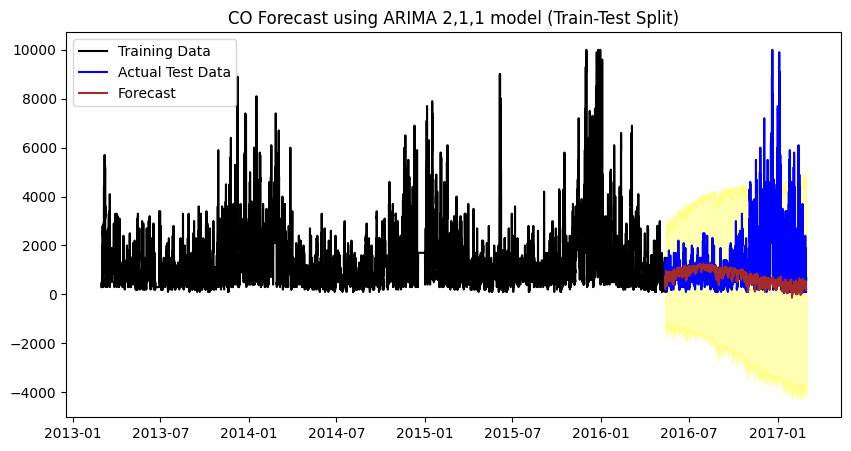

In [165]:
# Forecast CO levels for Test Period using ARIMA 2,1,1 model with 3 exogenous variables: temp, dewp and wd_direction
forecast_CO= COresult_5.get_forecast(steps=len(COseries_test), exog=exog_2_test)
forecast_CO_mean = forecast_CO.predicted_mean
conf_int = forecast_CO.conf_int()

# Plot Actual vs Forecast to visualize the forecasted CO values
plt.figure(figsize=(10, 5))
plt.plot(COseries_train.index, COseries_train, label="Training Data", color="black")
plt.plot(COseries_test.index, COseries_test, label="Actual Test Data", color="blue")
plt.plot(COseries_test.index, forecast_CO_mean, label="Forecast", color="brown")
plt.fill_between(COseries_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("CO Forecast using ARIMA 2,1,1 model (Train-Test Split)")
plt.show()

**Training Data (Black Line):** historical CO levels used to train the model (**January 2013 to mid-2016**). 
- It highlights the trends and patterns the ARIMA model used to predict future values.

**Actual Test Data (Blue Line):** observed CO levels during the test period (**mid-2016 to January 2017**).
- This provides a benchmark to evaluate how accurately the model's forecast aligns with actual CO levels.

**Forecast (Red Line with Yellow Shaded Area):** ARIMA(2,1,1) model's predictions for CO levels during the test period.

**yellow shaded area** - confidence intervals, providing a range of uncertainty for the model's forecasted values.
- Close alignment of the blue (actual data) and red (forecast) lines demonstrates good predictive performance. 
- Most actual data points appear to fall within the yellow shaded area, indicating well-calibrated confidence intervals.

**Observations:**
- **Model Accuracy:** The red forecast line closely follows the blue actual test line, signaling that the model captures CO trends effectively.
- **Unexplained Variations:** Any discrepancies between the red and blue lines might indicate external factors or anomalies the model could not account for.
- **Trends:** The overall alignment suggests the ARIMA(2,1,1) model successfully identifies and replicates recurring patterns in CO levels.

**Summary:**
- ThE plot confirms that the ARIMA(2,1,1) model performs well in forecasting CO levels, with its predictions closely mirroring the actual data during the test period. 
- It also provides a measure of uncertainty through the confidence intervals.

#### 8.5.2. Model Evaluation - CO Levels

In [168]:
# Evaluate Model Performance
forecast_CO_values = forecast_CO.predicted_mean
mae = mean_absolute_error(COseries_test, forecast_CO_values)
rmse = np.sqrt(mean_squared_error(COseries_test, forecast_CO_values))

print(f"\nCO - ARIMA 2,1,1 Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


CO - ARIMA 2,1,1 Model Performance:
MAE: 846.09
RMSE: 1521.00


**Mean Absolute Error (MAE): 846.09**  
   - On average, the model's predictions deviate from the actual CO levels by **846.09 units**. 
   - A lower MAE indicates a more accurate model.

**Root Mean Square Error (RMSE): 1521.00**  
   -  The value of **1521.00** reflects the typical size of prediction errors, with greater sensitivity to outliers compared to MAE.

**Interpretation**:
- The RMSE is significantly higher than the MAE, suggesting the presence of some larger prediction errors that contribute more heavily to the RMSE.
- These values should be assessed relative to the scale of the CO levels in your dataset. 
- If CO levels span thousands, the performance might be acceptable; if not, the model may require refinement.

**Potential Improvements**:
- **Hyperparameter Tuning:** Adjusting the p, d, q values or testing alternative models (e.g., ARIMA(2,1,2) or SARIMA) could improve performance.
- **Exogenous Variables:** Ensure the external predictors (like TEMP, DEWP, etc.) are well-calibrated and capture meaningful patterns.
- **Addressing Residual Diagnostics:** If residuals show heteroskedasticity or non-normality, transformations or advanced methods might be needed.

### 8.6 03 Levels

#### 8.6.1. Model Selection & Training - O3 Levels

Based on the observations from the ACF/PACF plots for O3, the following models will be tested:
- ARIMA (2, 0, 0)
- ARIMA (2, 0, 1) 
- ARIMA (2, 1, 0) - 1st order differencing will be applied incase of non-stationarity
- ARIMA (2, 1, 1) - 1st order differencing will be applied incase of non-stationarity

In [169]:
# Select target variable: O3
O3series = Aotizhongxin_data['O3'].dropna() # drop any missing values

# Select exogenous variables:
exog_vars = ['TEMP', 'PRES', 'DEWP','RAIN', 'WSPM', 'wd_direction']
exog_data = Aotizhongxin_data[exog_vars].ffill().dropna() # fill missing values with the previous value and drop any remaining missing values

# Ensure series and exogenous variables are aligned
O3series, exog_data = O3series.align(exog_data, join='inner', axis=0) 

O3series = O3series.sort_index()  # Ensure chronological order
exog_data = exog_data.sort_index()  # Ensure chronological order

In [170]:
# Train-test split (80% train, 20% test)
train_size = int(0.8 * len(O3series)) # 80% train
O3series_train, O3series_test = O3series.iloc[:train_size], O3series.iloc[train_size:] # splitting the target variable
exog_train, exog_test = exog_data.iloc[:train_size], exog_data.iloc[train_size:] # splitting the exogenous variables

ARIMA (2, 0, 0) Model

In [171]:
# Fit ARIMA model on O3series_train data with p,d,q as 2,0,0. 
model = ARIMA(O3series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 0, 0))  # Replace p, d, q with values
O3result_1 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(O3result_1.summary())

                               SARIMAX Results                                
Dep. Variable:                     O3   No. Observations:                28051
Model:                 ARIMA(2, 0, 0)   Log Likelihood             -113818.410
Date:                Tue, 11 Mar 2025   AIC                         227656.820
Time:                        18:25:05   BIC                         227739.238
Sample:                    03-01-2013   HQIC                        227683.350
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -146.5164     95.664     -1.532      0.126    -334.014      40.981
TEMP             2.1589      0.066     32.639      0.000       2.029       2.289
PRES             0.1686      0.094      1.78

ARIMA (2, 0, 1) Model

In [172]:
# Fit ARIMA model on O3series_train data with p,d,q as 2,0,1. 
model = ARIMA(O3series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 0, 1))  # Replace p, d, q with values
O3result_2 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(O3result_2.summary())

                               SARIMAX Results                                
Dep. Variable:                     O3   No. Observations:                28051
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -113624.409
Date:                Tue, 11 Mar 2025   AIC                         227270.817
Time:                        18:27:12   BIC                         227361.477
Sample:                    03-01-2013   HQIC                        227300.000
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -146.5160     92.303     -1.587      0.112    -327.427      34.395
TEMP             1.9477      0.065     29.857      0.000       1.820       2.076
PRES             0.1713      0.091      1.88

ARIMA (2, 1, 0) Model

In [173]:
# Fit ARIMA model on O3series_train data with p,d,q as 2,1,0
model = ARIMA(O3series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 0))  # Replace p, d, q with values
O3result_3 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(O3result_3.summary())

                               SARIMAX Results                                
Dep. Variable:                     O3   No. Observations:                28051
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -114698.538
Date:                Tue, 11 Mar 2025   AIC                         229415.075
Time:                        18:27:30   BIC                         229489.251
Sample:                    03-01-2013   HQIC                        229438.952
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP             1.9116      0.076     25.047      0.000       1.762       2.061
PRES            -0.8291      0.112     -7.406      0.000      -1.049      -0.610
DEWP            -0.0760      0.057     -1.33

ARIMA (2, 1, 1) Model

In [174]:
# Fit ARIMA model on O3series_train data with p,d,q as 2,1,1
model = ARIMA(O3series_train, 
              exog=exog_train,  # Exogenous variables
              order=(2, 1, 1))  # Replace p, d, q with values
O3result_4 = model.fit(method_kwargs={"maxiter": 500})

# Model Summary
print(O3result_4.summary())

/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/h.nderitu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     O3   No. Observations:                28051
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -114698.015
Date:                Tue, 11 Mar 2025   AIC                         229416.030
Time:                        18:28:12   BIC                         229498.448
Sample:                    03-01-2013   HQIC                        229442.560
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TEMP             1.9064      0.076     24.966      0.000       1.757       2.056
PRES            -0.8296      0.112     -7.404      0.000      -1.049      -0.610
DEWP            -0.0722      0.057     -1.27

On comparison of the 4 models the ARIMA (2,0,1) model has the lowest AIC/BIC

**Analysis of ARIMA(2,0,1) Model for O₃ (Ozone Levels)**    
**Model Fit**
- **AIC = 227270.817** 
- **BIC = 227361.477** 
- **Lower AIC and BIC indicate better model performance**, making this model an improvement over ARIMA(2,0,0).
- 
**Coefficient Interpretations**

**Significant Variables (p < 0.05)**
- **TEMP (1.9477, p < 0.0001)**: Temperature has a **strong positive effect on O₃ levels**.  
- **RAIN (0.2068, p < 0.0001)**: Rainfall is positively correlated with O₃ levels.  
- **AR(1) = 1.6128, AR(2) = -0.6782**:  
  - AR(1) is quite **large (>1)**, which could indicate potential **stationarity issues**.  
  - AR(2) is strongly negative, which could mean oscillatory behavior.  
- **MA(1) (-0.3356, p < 0.0001)**:  
  - The moving average term is significant, meaning it helps **correct short-term forecast errors**.

**Insignificant Variables (p > 0.05)**
- **const (-146.5160, p = 0.112)**: **not significant**, suggesting that differencing might be necessary.  
- **PRES (0.1713, p = 0.060)**: Nearly significant but weak.  
- **DEWP (0.0490, p = 0.279)**: Not significant, meaning dew point does not contribute much to O₃ levels.  
- **WSPM (0.0879, p = 0.346)**: Wind speed is also **not significant**.  
- **wd_direction (0.0013, p = 0.098)**: Not statistically meaningful.
- 
**Residual Analysis**
- **Ljung-Box Test (Q = 9.94, p < 0.0001)**
  - **Residuals still show autocorrelation**, meaning the model could be missing some structure.  
- **Jarque-Bera Test (p < 0.0001, Kurtosis = 16.86)**
  - Residuals **are not normally distributed**, and heavy tails persist.  
- **Heteroskedasticity Test (H = 1.21, p < 0.0001)**
  - Variance is still **not constant**, suggesting possible **GARCH modeling**.  

**Conclusion: ARIMA(2,0,1) is Better but Not Ideal**

SARIMA model with seasonality as 4 seasons

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define seasonal period (4 for four seasons)
seasonality = 24 # Daily seasonality

# Fit SARIMA model with seasonal components
model = SARIMAX(O3series_train, 
                exog=exog_train,  # Exogenous variables (Temperature, Rain, etc.)
                order=(2, 0, 1),   # ARIMA(p,d,q) = (2,0,1)
                seasonal_order=(2, 0, 1, seasonality),  # Seasonal ARIMA(P,D,Q,s)
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit model with increased iterations
O3result_seasonal = model.fit(method_kwargs={"maxiter": 500})

# Print Model Summary
print(O3result_seasonal.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25482D+00    |proj g|=  2.14149D+00


 This problem is unconstrained.



At iterate    5    f=  4.17851D+00    |proj g|=  2.97449D-01


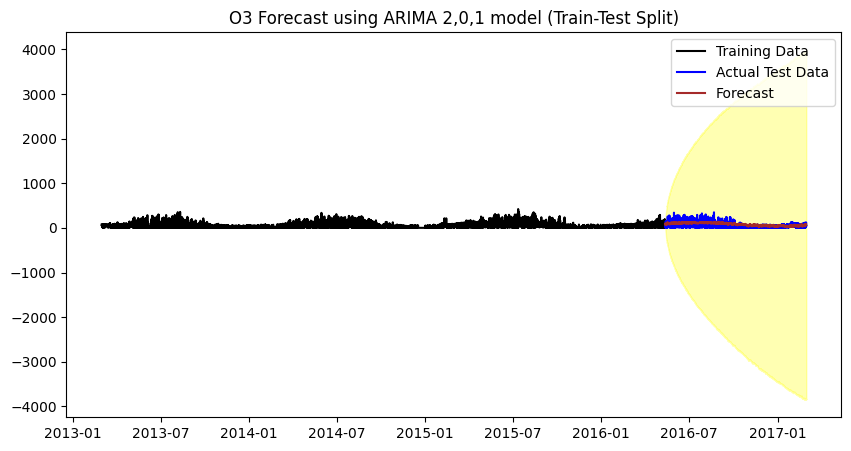

In [183]:
# Forecast 03 levels for Test Period using ARIMA 2,0,1 model
forecast_O3= O3result_4.get_forecast(steps=len(O3series_test), exog=exog_test)
forecast_03_mean = forecast_O3.predicted_mean
conf_int = forecast_O3.conf_int()

# Plot Actual vs Forecast to visualize the forecasted CO values
plt.figure(figsize=(10, 5))
plt.plot(O3series_train.index, O3series_train, label="Training Data", color="black")
plt.plot(O3series_test.index, O3series_test, label="Actual Test Data", color="blue")
plt.plot(O3series_test.index, forecast_03_mean, label="Forecast", color="brown")
plt.fill_between(O3series_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="yellow", alpha=0.3)
plt.legend()
plt.title("O3 Forecast using ARIMA 2,0,1 model (Train-Test Split)")
plt.show()

#### 8.6.2. Model Evaluation - 03 Levels